<a href="https://colab.research.google.com/github/MarouaHY/LP_detection/blob/main/combined_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COMBINED MODELS ( YOLOv11m + OCR )

In [ ]:
!pip install ultralytics



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.3/949.3 kB 29.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 106.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 80.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 56.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 884.1 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 61.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninst

[2025/03/08 00:08:15] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_l

[2025/03/08 00:08:17] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.029895782470703125
[2025/03/08 00:08:17] ppocr DEBUG: cls num  : 1, elapsed : 0.015769004821777344
[2025/03/08 00:08:17] ppocr DEBUG: rec_res num  : 1, elapsed : 0.056537628173828125
PaddleOCR Text: 06657711716


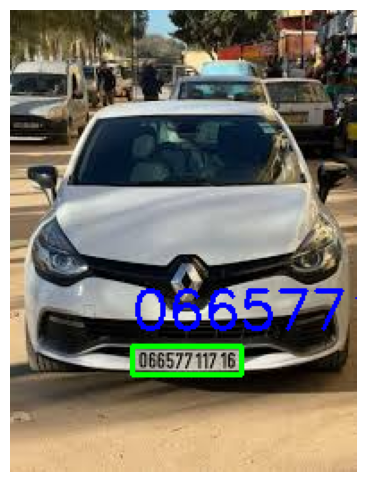

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO
from paddleocr import PaddleOCR
from google.colab.patches import cv2_imshow
import os

# Set up PaddleOCR
ocr = PaddleOCR(use_angle_cls=True, lang="en")  # Initialize PaddleOCR

# Load YOLO model
model = YOLO("/content/best (1).pt")  # Change to your trained YOLO model

# Load the image
image_path = "/content/testing image.jpg"
if not os.path.exists(image_path):
    raise FileNotFoundError(f"The image path {image_path} does not exist.")

image = cv2.imread(image_path)
if image is None:
    raise ValueError(f"Failed to load the image from {image_path}.")

# Run YOLO detection
results = model(image)

# Function to preprocess the cropped plate for better OCR
def preprocess_plate(plate):
    gray_plate = cv2.cvtColor(plate, cv2.COLOR_BGR2GRAY)
    # Apply bilateral filter to remove noise while keeping edges sharp
    filtered_plate = cv2.bilateralFilter(gray_plate, 11, 17, 17)
    _, binary_plate = cv2.threshold(filtered_plate, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return binary_plate

# Function to call PaddleOCR
def paddleocr_detection(image):
    result = ocr.ocr(image)
    if result:
        return ' '.join([line[1][0] for line in result[0]])
    return ""

# Process each detected plate
for result in results:
    for box in result.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])  # Get box coordinates
        cropped_plate = image[y1:y2, x1:x2]  # Crop plate region

        # Preprocess the plate image
        processed_plate = preprocess_plate(cropped_plate)

        # Display the cropped license plate in grayscale
        cv2_imshow(processed_plate)

        # Run PaddleOCR
        plate_text = paddleocr_detection(processed_plate)

        print("PaddleOCR Text:", plate_text)

        # Draw bounding box on the original image
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

        # Display the plate text at the top of the car image
        text_y = y1 - 10 if y1 - 10 > 10 else y1 + 30  # Adjust if near the top edge
        cv2.putText(image, plate_text, (x1, text_y), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

# Show final image with detected plates & text
plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()


# TESTING PART ( BATCH d'images )

[2025/03/17 22:28:58] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_l

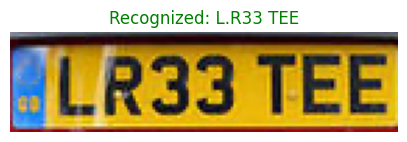

Processing: /content/extracted_images/images ocr/Cars184.png

0: 384x640 1 licence, 948.7ms
Speed: 4.9ms preprocess, 948.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)
[2025/03/17 22:29:02] ppocr DEBUG: dt_boxes num : 0, elapsed : 0.048433542251586914
[2025/03/17 22:29:02] ppocr DEBUG: cls num  : 0, elapsed : 0
[2025/03/17 22:29:02] ppocr DEBUG: rec_res num  : 0, elapsed : 2.6226043701171875e-06
PaddleOCR Text: 


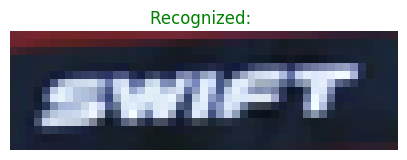

Processing: /content/extracted_images/images ocr/Cars64.png

0: 448x640 2 licences, 1085.7ms
Speed: 4.6ms preprocess, 1085.7ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)
[2025/03/17 22:29:04] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.07196617126464844
[2025/03/17 22:29:04] ppocr DEBUG: cls num  : 1, elapsed : 0.018467187881469727
[2025/03/17 22:29:04] ppocr DEBUG: rec_res num  : 1, elapsed : 0.06717181205749512
PaddleOCR Text: TAXI


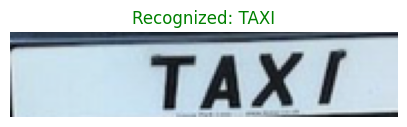

[2025/03/17 22:29:04] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.018984079360961914
[2025/03/17 22:29:04] ppocr DEBUG: cls num  : 1, elapsed : 0.012295246124267578
[2025/03/17 22:29:04] ppocr DEBUG: rec_res num  : 1, elapsed : 0.06384038925170898
PaddleOCR Text: TAX!


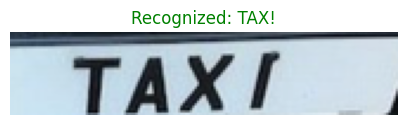

Processing: /content/extracted_images/images ocr/Cars226.png

0: 448x640 1 licence, 1075.6ms
Speed: 4.3ms preprocess, 1075.6ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)
[2025/03/17 22:29:05] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.018216848373413086
[2025/03/17 22:29:05] ppocr DEBUG: cls num  : 1, elapsed : 0.01341104507446289
[2025/03/17 22:29:05] ppocr DEBUG: rec_res num  : 1, elapsed : 0.06482839584350586
PaddleOCR Text: T19S4523


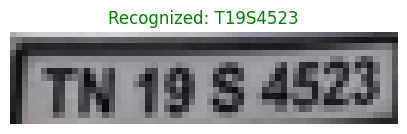

Processing: /content/extracted_images/images ocr/Cars24.png

0: 480x640 1 licence, 1152.7ms
Speed: 5.4ms preprocess, 1152.7ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)
[2025/03/17 22:29:07] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.0161745548248291
[2025/03/17 22:29:07] ppocr DEBUG: cls num  : 1, elapsed : 0.010792255401611328
[2025/03/17 22:29:07] ppocr DEBUG: rec_res num  : 1, elapsed : 0.0695350170135498
PaddleOCR Text: Hi55 369


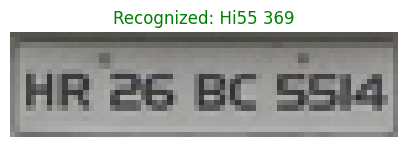

Processing: /content/extracted_images/images ocr/Cars33.png

0: 384x640 2 licences, 1225.7ms
Speed: 4.2ms preprocess, 1225.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)
[2025/03/17 22:29:08] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.14855718612670898
[2025/03/17 22:29:08] ppocr DEBUG: cls num  : 1, elapsed : 0.015529632568359375
[2025/03/17 22:29:08] ppocr DEBUG: rec_res num  : 1, elapsed : 0.0967550277709961
PaddleOCR Text: 0X65 AWD


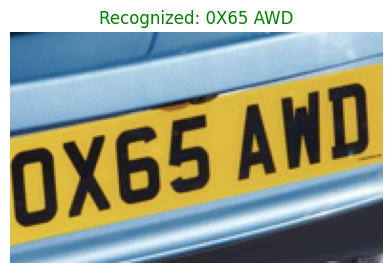

[2025/03/17 22:29:09] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.14410662651062012
[2025/03/17 22:29:09] ppocr DEBUG: cls num  : 1, elapsed : 0.01517486572265625
[2025/03/17 22:29:09] ppocr DEBUG: rec_res num  : 1, elapsed : 0.0975637435913086
PaddleOCR Text: OX65 AWD


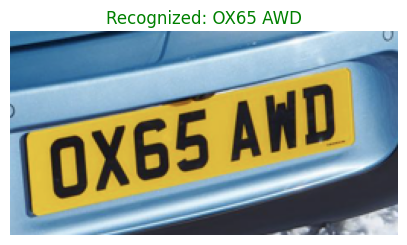

Processing: /content/extracted_images/images ocr/Cars53.png

0: 480x640 1 licence, 1820.0ms
Speed: 6.1ms preprocess, 1820.0ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)
[2025/03/17 22:29:11] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.026637792587280273
[2025/03/17 22:29:11] ppocr DEBUG: cls num  : 1, elapsed : 0.01877450942993164
[2025/03/17 22:29:11] ppocr DEBUG: rec_res num  : 1, elapsed : 0.07033824920654297
PaddleOCR Text: CHIO OSE


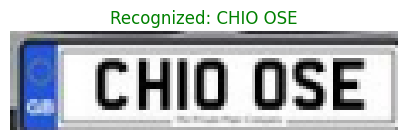

Processing: /content/extracted_images/images ocr/Cars245.png

0: 448x640 1 licence, 1086.0ms
Speed: 5.1ms preprocess, 1086.0ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)
[2025/03/17 22:29:12] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.018687963485717773
[2025/03/17 22:29:12] ppocr DEBUG: cls num  : 1, elapsed : 0.0155487060546875
[2025/03/17 22:29:12] ppocr DEBUG: rec_res num  : 1, elapsed : 0.06827235221862793
PaddleOCR Text: R268R9044


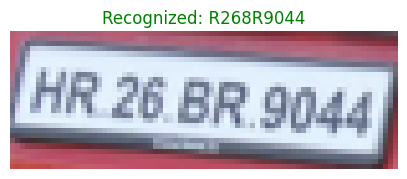

Processing: /content/extracted_images/images ocr/Cars56.png

0: 320x640 (no detections), 798.5ms
Speed: 3.3ms preprocess, 798.5ms inference, 0.6ms postprocess per image at shape (1, 3, 320, 640)
Processing: /content/extracted_images/images ocr/Cars231.png

0: 448x640 1 licence, 1106.2ms
Speed: 5.9ms preprocess, 1106.2ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)
[2025/03/17 22:29:14] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.01914048194885254
[2025/03/17 22:29:14] ppocr DEBUG: cls num  : 1, elapsed : 0.014590024948120117
[2025/03/17 22:29:14] ppocr DEBUG: rec_res num  : 1, elapsed : 0.06509900093078613
PaddleOCR Text: GBIB TCE


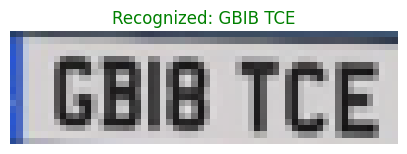

Processing: /content/extracted_images/images ocr/Cars101.png

0: 480x640 1 licence, 1169.3ms
Speed: 4.5ms preprocess, 1169.3ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)
[2025/03/17 22:29:16] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.021544456481933594
[2025/03/17 22:29:16] ppocr DEBUG: cls num  : 1, elapsed : 0.015491247177124023
[2025/03/17 22:29:16] ppocr DEBUG: rec_res num  : 1, elapsed : 0.06403756141662598
PaddleOCR Text: Hi55 369


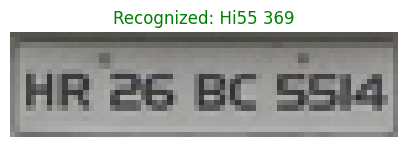

Processing: /content/extracted_images/images ocr/Cars128.png

0: 384x640 2 licences, 982.2ms
Speed: 3.9ms preprocess, 982.2ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)
[2025/03/17 22:29:17] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.027950286865234375
[2025/03/17 22:29:17] ppocr DEBUG: cls num  : 1, elapsed : 0.015636682510375977
[2025/03/17 22:29:17] ppocr DEBUG: rec_res num  : 1, elapsed : 0.06936359405517578
PaddleOCR Text: 0X65 AWD


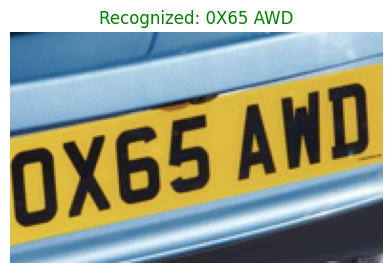

[2025/03/17 22:29:17] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.04242086410522461
[2025/03/17 22:29:17] ppocr DEBUG: cls num  : 1, elapsed : 0.020175457000732422
[2025/03/17 22:29:17] ppocr DEBUG: rec_res num  : 1, elapsed : 0.08469843864440918
PaddleOCR Text: OX65 AWD


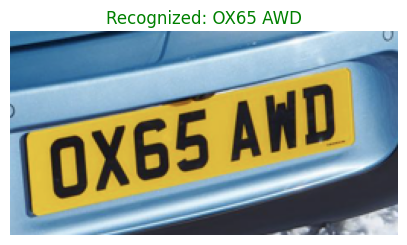

Processing: /content/extracted_images/images ocr/Cars39.png

0: 480x640 1 licence, 1375.9ms
Speed: 6.3ms preprocess, 1375.9ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)
[2025/03/17 22:29:19] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.03043651580810547
[2025/03/17 22:29:19] ppocr DEBUG: cls num  : 1, elapsed : 0.01861715316772461
[2025/03/17 22:29:19] ppocr DEBUG: rec_res num  : 1, elapsed : 0.11734223365783691
PaddleOCR Text: MH15808877


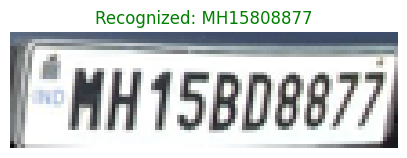

Processing: /content/extracted_images/images ocr/Cars167.png

0: 512x640 1 licence, 1758.2ms
Speed: 6.5ms preprocess, 1758.2ms inference, 1.1ms postprocess per image at shape (1, 3, 512, 640)
[2025/03/17 22:29:21] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.034094810485839844
[2025/03/17 22:29:21] ppocr DEBUG: cls num  : 1, elapsed : 0.02716970443725586
[2025/03/17 22:29:21] ppocr DEBUG: rec_res num  : 1, elapsed : 0.13355565071105957
PaddleOCR Text: 15-LK-10898


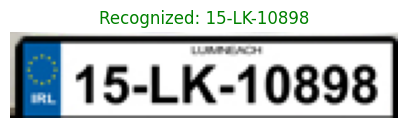

Processing: /content/extracted_images/images ocr/Cars159.png

0: 544x640 1 licence, 3214.2ms
Speed: 9.2ms preprocess, 3214.2ms inference, 2.1ms postprocess per image at shape (1, 3, 544, 640)
[2025/03/17 22:29:24] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.027541637420654297
[2025/03/17 22:29:24] ppocr DEBUG: cls num  : 1, elapsed : 0.01898479461669922
[2025/03/17 22:29:25] ppocr DEBUG: rec_res num  : 1, elapsed : 0.10302352905273438
PaddleOCR Text: DL7C N 5617


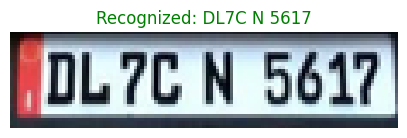

Processing: /content/extracted_images/images ocr/Cars200.png

0: 416x640 1 licence, 1204.1ms
Speed: 8.7ms preprocess, 1204.1ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 640)
[2025/03/17 22:29:26] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.020401716232299805
[2025/03/17 22:29:26] ppocr DEBUG: cls num  : 1, elapsed : 0.01486968994140625
[2025/03/17 22:29:26] ppocr DEBUG: rec_res num  : 1, elapsed : 0.09273386001586914
PaddleOCR Text: A03AB 3380


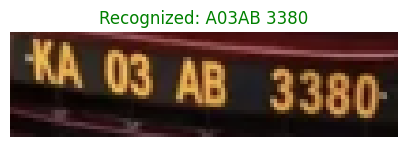

Processing: /content/extracted_images/images ocr/Cars133.png

0: 448x640 1 licence, 1114.5ms
Speed: 5.2ms preprocess, 1114.5ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)
[2025/03/17 22:29:27] ppocr DEBUG: dt_boxes num : 2, elapsed : 0.01896524429321289
[2025/03/17 22:29:27] ppocr DEBUG: cls num  : 2, elapsed : 0.05333352088928223
[2025/03/17 22:29:27] ppocr DEBUG: rec_res num  : 2, elapsed : 0.20664238929748535
PaddleOCR Text: 1268


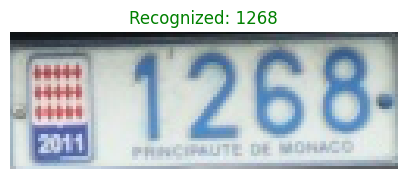

Processing: /content/extracted_images/images ocr/Cars153.png

0: 384x640 1 licence, 974.9ms
Speed: 5.3ms preprocess, 974.9ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)
[2025/03/17 22:29:29] ppocr DEBUG: dt_boxes num : 2, elapsed : 0.08210945129394531
[2025/03/17 22:29:29] ppocr DEBUG: cls num  : 2, elapsed : 0.016574382781982422
[2025/03/17 22:29:29] ppocr DEBUG: rec_res num  : 2, elapsed : 0.25658273696899414
PaddleOCR Text: MH 2O BQ 20


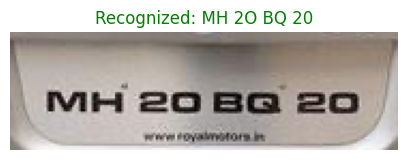

Processing: /content/extracted_images/images ocr/Cars48.png

0: 384x640 1 licence, 962.9ms
Speed: 3.8ms preprocess, 962.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)
[2025/03/17 22:29:30] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.07960677146911621
[2025/03/17 22:29:30] ppocr DEBUG: cls num  : 1, elapsed : 0.015928983688354492
[2025/03/17 22:29:30] ppocr DEBUG: rec_res num  : 1, elapsed : 0.1095132827758789
PaddleOCR Text: ALR 486


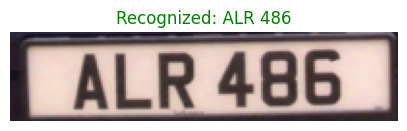

Processing: /content/extracted_images/images ocr/Cars182.png

0: 384x640 1 licence, 999.8ms
Speed: 4.6ms preprocess, 999.8ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)
[2025/03/17 22:29:31] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.019306421279907227
[2025/03/17 22:29:31] ppocr DEBUG: cls num  : 1, elapsed : 0.013135910034179688
[2025/03/17 22:29:31] ppocr DEBUG: rec_res num  : 1, elapsed : 0.09749150276184082
PaddleOCR Text: V12LAF


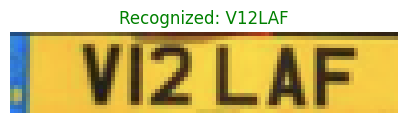

Processing: /content/extracted_images/images ocr/Cars248.png

0: 480x640 1 licence, 1194.0ms
Speed: 5.8ms preprocess, 1194.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
[2025/03/17 22:29:33] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.017885923385620117
[2025/03/17 22:29:33] ppocr DEBUG: cls num  : 1, elapsed : 0.01390385627746582
[2025/03/17 22:29:33] ppocr DEBUG: rec_res num  : 1, elapsed : 0.08718276023864746
PaddleOCR Text: HH12DE1433


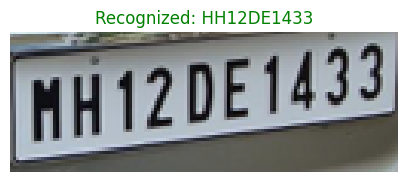

Processing: /content/extracted_images/images ocr/Cars189.png

0: 448x640 1 licence, 1098.4ms
Speed: 5.6ms preprocess, 1098.4ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)
[2025/03/17 22:29:34] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.021046161651611328
[2025/03/17 22:29:34] ppocr DEBUG: cls num  : 1, elapsed : 0.014012336730957031
[2025/03/17 22:29:34] ppocr DEBUG: rec_res num  : 1, elapsed : 0.08503055572509766
PaddleOCR Text: CH01AN0001


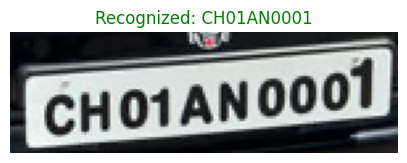

Processing: /content/extracted_images/images ocr/Cars0.png

0: 352x640 1 licence, 885.0ms
Speed: 4.5ms preprocess, 885.0ms inference, 0.9ms postprocess per image at shape (1, 3, 352, 640)
[2025/03/17 22:29:35] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.02168750762939453
[2025/03/17 22:29:35] ppocr DEBUG: cls num  : 1, elapsed : 0.01590275764465332
[2025/03/17 22:29:35] ppocr DEBUG: rec_res num  : 1, elapsed : 0.11987066268920898
PaddleOCR Text: KLG1CA2555


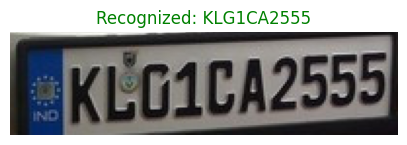

Processing: /content/extracted_images/images ocr/Cars10.png

0: 384x640 1 licence, 1460.3ms
Speed: 5.7ms preprocess, 1460.3ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)
[2025/03/17 22:29:37] ppocr DEBUG: dt_boxes num : 3, elapsed : 0.12437176704406738
[2025/03/17 22:29:37] ppocr DEBUG: cls num  : 3, elapsed : 0.06366205215454102
[2025/03/17 22:29:38] ppocr DEBUG: rec_res num  : 3, elapsed : 0.41929006576538086
PaddleOCR Text: TN 37 CS  765


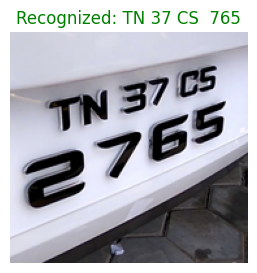

Processing: /content/extracted_images/images ocr/Cars181.png

0: 640x384 1 licence, 1448.0ms
Speed: 6.4ms preprocess, 1448.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)
[2025/03/17 22:29:39] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.041419029235839844
[2025/03/17 22:29:39] ppocr DEBUG: cls num  : 1, elapsed : 0.013566970825195312
[2025/03/17 22:29:39] ppocr DEBUG: rec_res num  : 1, elapsed : 0.09315919876098633
PaddleOCR Text: HHII


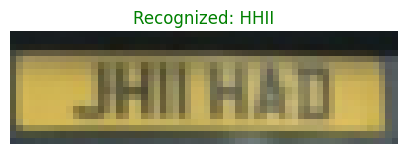

Processing: /content/extracted_images/images ocr/Cars51.png

0: 448x640 1 licence, 1169.5ms
Speed: 5.0ms preprocess, 1169.5ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)
[2025/03/17 22:29:41] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.018423080444335938
[2025/03/17 22:29:41] ppocr DEBUG: cls num  : 1, elapsed : 0.013718128204345703
[2025/03/17 22:29:41] ppocr DEBUG: rec_res num  : 1, elapsed : 0.09938645362854004
PaddleOCR Text: 


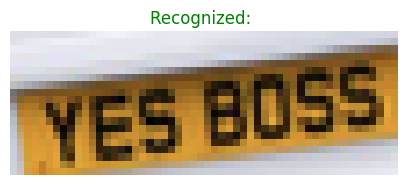

Processing: /content/extracted_images/images ocr/Cars3.png

0: 384x640 1 licence, 1314.5ms
Speed: 4.6ms preprocess, 1314.5ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)
[2025/03/17 22:29:42] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.018810510635375977
[2025/03/17 22:29:42] ppocr DEBUG: cls num  : 1, elapsed : 0.013400793075561523
[2025/03/17 22:29:42] ppocr DEBUG: rec_res num  : 1, elapsed : 0.09602618217468262
PaddleOCR Text: DZl7 YXR


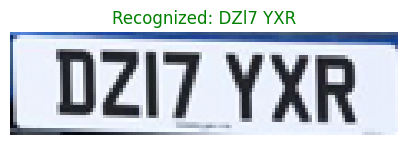

Processing: /content/extracted_images/images ocr/Cars27.png

0: 384x640 1 licence, 1020.3ms
Speed: 4.6ms preprocess, 1020.3ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)
[2025/03/17 22:29:44] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.02065253257751465
[2025/03/17 22:29:44] ppocr DEBUG: cls num  : 1, elapsed : 0.013455867767333984
[2025/03/17 22:29:44] ppocr DEBUG: rec_res num  : 1, elapsed : 0.09573221206665039
PaddleOCR Text: DZl7 YXR


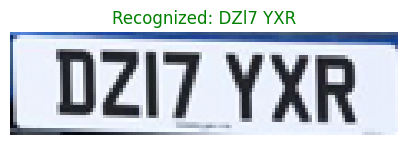

Processing: /content/extracted_images/images ocr/Cars12.png

0: 256x640 1 licence, 692.9ms
Speed: 2.7ms preprocess, 692.9ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)
[2025/03/17 22:29:44] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.018144845962524414
[2025/03/17 22:29:44] ppocr DEBUG: cls num  : 1, elapsed : 0.012864351272583008
[2025/03/17 22:29:45] ppocr DEBUG: rec_res num  : 1, elapsed : 0.1000359058380127
PaddleOCR Text: MH129G7237


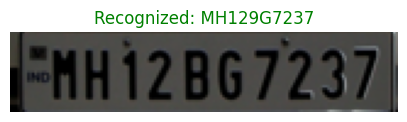

Processing: /content/extracted_images/images ocr/Cars161.png

0: 512x640 1 licence, 1328.6ms
Speed: 6.0ms preprocess, 1328.6ms inference, 1.3ms postprocess per image at shape (1, 3, 512, 640)
[2025/03/17 22:29:46] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.020503520965576172
[2025/03/17 22:29:46] ppocr DEBUG: cls num  : 1, elapsed : 0.014291524887084961
[2025/03/17 22:29:46] ppocr DEBUG: rec_res num  : 1, elapsed : 0.10201120376586914
PaddleOCR Text: M666Y06


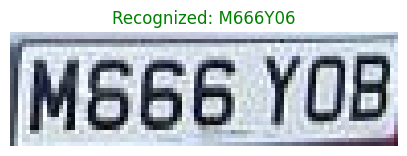

Processing: /content/extracted_images/images ocr/Cars11.png

0: 512x640 1 licence, 1317.5ms
Speed: 5.3ms preprocess, 1317.5ms inference, 1.3ms postprocess per image at shape (1, 3, 512, 640)
[2025/03/17 22:29:48] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.019057273864746094
[2025/03/17 22:29:48] ppocr DEBUG: cls num  : 1, elapsed : 0.012844562530517578
[2025/03/17 22:29:48] ppocr DEBUG: rec_res num  : 1, elapsed : 0.09643363952636719
PaddleOCR Text: WOR 5I6K


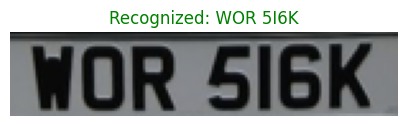

Processing: /content/extracted_images/images ocr/Cars190.png

0: 480x640 1 licence, 1323.1ms
Speed: 5.1ms preprocess, 1323.1ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)
[2025/03/17 22:29:49] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.01904463768005371
[2025/03/17 22:29:49] ppocr DEBUG: cls num  : 1, elapsed : 0.013334035873413086
[2025/03/17 22:29:49] ppocr DEBUG: rec_res num  : 1, elapsed : 0.10575151443481445
PaddleOCR Text: KL54A-2670


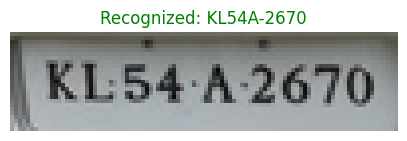

Processing: /content/extracted_images/images ocr/Cars251.png

0: 384x640 1 licence, 1600.0ms
Speed: 5.5ms preprocess, 1600.0ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)
[2025/03/17 22:29:51] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.016155004501342773
[2025/03/17 22:29:51] ppocr DEBUG: cls num  : 1, elapsed : 0.012705802917480469
[2025/03/17 22:29:51] ppocr DEBUG: rec_res num  : 1, elapsed : 0.12667131423950195
PaddleOCR Text: H8.


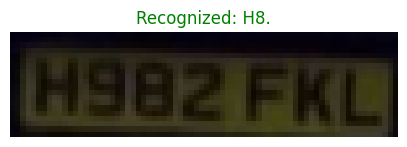

Processing: /content/extracted_images/images ocr/Cars126.png

0: 480x640 1 licence, 2380.3ms
Speed: 4.9ms preprocess, 2380.3ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)
[2025/03/17 22:29:54] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.09641742706298828
[2025/03/17 22:29:54] ppocr DEBUG: cls num  : 1, elapsed : 0.014355659484863281
[2025/03/17 22:29:54] ppocr DEBUG: rec_res num  : 1, elapsed : 0.08944582939147949
PaddleOCR Text: KA G5MG190


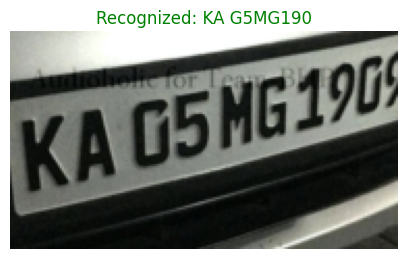

Processing: /content/extracted_images/images ocr/Cars14.png

0: 384x640 1 licence, 1016.1ms
Speed: 4.2ms preprocess, 1016.1ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)
[2025/03/17 22:29:55] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.01980113983154297
[2025/03/17 22:29:55] ppocr DEBUG: cls num  : 1, elapsed : 0.017202377319335938
[2025/03/17 22:29:55] ppocr DEBUG: rec_res num  : 1, elapsed : 0.10155034065246582
PaddleOCR Text: ALR 486


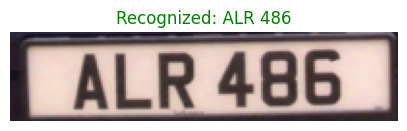

Processing: /content/extracted_images/images ocr/Cars219.png

0: 480x640 2 licences, 1461.5ms
Speed: 5.9ms preprocess, 1461.5ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)
[2025/03/17 22:29:57] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.10398459434509277
[2025/03/17 22:29:57] ppocr DEBUG: cls num  : 1, elapsed : 0.015562295913696289
[2025/03/17 22:29:57] ppocr DEBUG: rec_res num  : 1, elapsed : 0.13826227188110352
PaddleOCR Text: KA-03:MG : 27


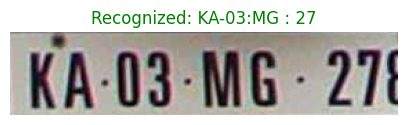

[2025/03/17 22:29:57] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.09456086158752441
[2025/03/17 22:29:57] ppocr DEBUG: cls num  : 1, elapsed : 0.013222455978393555
[2025/03/17 22:29:57] ppocr DEBUG: rec_res num  : 1, elapsed : 0.08791208267211914
PaddleOCR Text: 03:MG: 2784


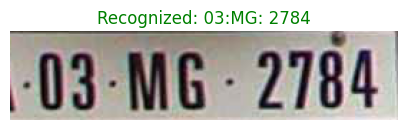

Processing: /content/extracted_images/images ocr/Cars59.png

0: 480x640 1 licence, 1277.9ms
Speed: 4.4ms preprocess, 1277.9ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)
[2025/03/17 22:29:59] ppocr DEBUG: dt_boxes num : 0, elapsed : 0.01665186882019043
[2025/03/17 22:29:59] ppocr DEBUG: cls num  : 0, elapsed : 0
[2025/03/17 22:29:59] ppocr DEBUG: rec_res num  : 0, elapsed : 2.1457672119140625e-06
PaddleOCR Text: 


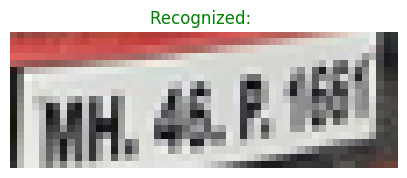

Processing: /content/extracted_images/images ocr/Cars198.png

0: 512x640 1 licence, 1455.5ms
Speed: 5.6ms preprocess, 1455.5ms inference, 1.3ms postprocess per image at shape (1, 3, 512, 640)
[2025/03/17 22:30:00] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.01796245574951172
[2025/03/17 22:30:00] ppocr DEBUG: cls num  : 1, elapsed : 0.012835502624511719
[2025/03/17 22:30:01] ppocr DEBUG: rec_res num  : 1, elapsed : 0.11973166465759277
PaddleOCR Text: MHO1AY8866


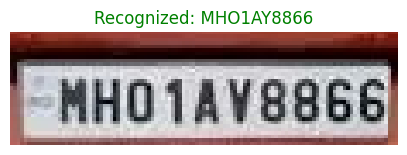

Processing: /content/extracted_images/images ocr/Cars34.png

0: 544x640 1 licence, 1841.1ms
Speed: 8.6ms preprocess, 1841.1ms inference, 1.3ms postprocess per image at shape (1, 3, 544, 640)
[2025/03/17 22:30:03] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.018567323684692383
[2025/03/17 22:30:03] ppocr DEBUG: cls num  : 1, elapsed : 0.013897418975830078
[2025/03/17 22:30:03] ppocr DEBUG: rec_res num  : 1, elapsed : 0.09627532958984375
PaddleOCR Text: DL7C N 5617


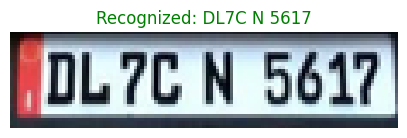

Processing: /content/extracted_images/images ocr/Cars97.png

0: 480x640 1 licence, 2579.2ms
Speed: 5.3ms preprocess, 2579.2ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)
[2025/03/17 22:30:05] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.059636831283569336
[2025/03/17 22:30:06] ppocr DEBUG: cls num  : 1, elapsed : 0.0911719799041748
[2025/03/17 22:30:06] ppocr DEBUG: rec_res num  : 1, elapsed : 0.3666086196899414
PaddleOCR Text: KA G5MG190


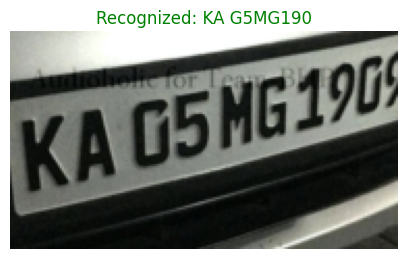

Processing: /content/extracted_images/images ocr/Cars116.png

0: 544x640 1 licence, 1943.1ms
Speed: 7.4ms preprocess, 1943.1ms inference, 1.3ms postprocess per image at shape (1, 3, 544, 640)
[2025/03/17 22:30:08] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.028859376907348633
[2025/03/17 22:30:08] ppocr DEBUG: cls num  : 1, elapsed : 0.015588998794555664
[2025/03/17 22:30:08] ppocr DEBUG: rec_res num  : 1, elapsed : 0.14571690559387207
PaddleOCR Text: MK-35-32


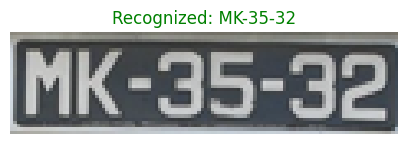

Processing: /content/extracted_images/images ocr/Cars246.png

0: 448x640 1 licence, 1584.2ms
Speed: 4.9ms preprocess, 1584.2ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)
[2025/03/17 22:30:10] ppocr DEBUG: dt_boxes num : 0, elapsed : 0.018429994583129883
[2025/03/17 22:30:10] ppocr DEBUG: cls num  : 0, elapsed : 0
[2025/03/17 22:30:10] ppocr DEBUG: rec_res num  : 0, elapsed : 2.384185791015625e-06
PaddleOCR Text: 


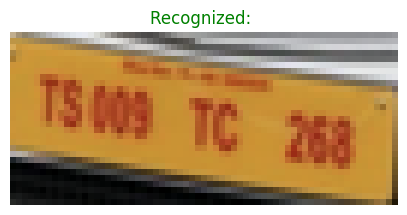

Processing: /content/extracted_images/images ocr/Cars8.png

0: 320x640 1 licence, 1053.9ms
Speed: 4.1ms preprocess, 1053.9ms inference, 1.1ms postprocess per image at shape (1, 3, 320, 640)
[2025/03/17 22:30:11] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.06297898292541504
[2025/03/17 22:30:11] ppocr DEBUG: cls num  : 1, elapsed : 0.013659954071044922
[2025/03/17 22:30:11] ppocr DEBUG: rec_res num  : 1, elapsed : 0.10927081108093262
PaddleOCR Text: G526 JHD


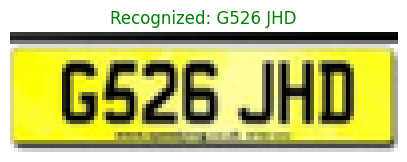

Processing: /content/extracted_images/images ocr/Cars259.png

0: 384x640 1 licence, 1248.5ms
Speed: 18.0ms preprocess, 1248.5ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)
[2025/03/17 22:30:13] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.02280902862548828
[2025/03/17 22:30:13] ppocr DEBUG: cls num  : 1, elapsed : 0.013134479522705078
[2025/03/17 22:30:13] ppocr DEBUG: rec_res num  : 1, elapsed : 0.1036384105682373
PaddleOCR Text: MH 20 EE 7598


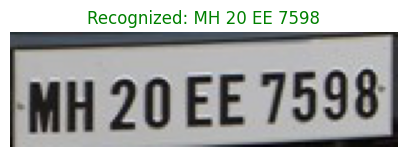

Processing: /content/extracted_images/images ocr/Cars52.png

0: 480x640 1 licence, 1381.0ms
Speed: 5.5ms preprocess, 1381.0ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)
[2025/03/17 22:30:14] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.01807236671447754
[2025/03/17 22:30:15] ppocr DEBUG: cls num  : 1, elapsed : 0.012649059295654297
[2025/03/17 22:30:15] ppocr DEBUG: rec_res num  : 1, elapsed : 0.09918689727783203
PaddleOCR Text: MH15808877


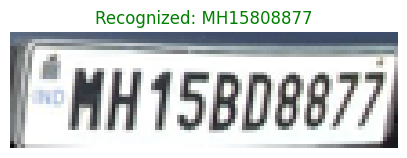

Processing: /content/extracted_images/images ocr/Cars102.png

0: 512x640 4 licences, 1479.3ms
Speed: 5.5ms preprocess, 1479.3ms inference, 1.2ms postprocess per image at shape (1, 3, 512, 640)
[2025/03/17 22:30:16] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.10285544395446777
[2025/03/17 22:30:16] ppocr DEBUG: cls num  : 1, elapsed : 0.014780521392822266
[2025/03/17 22:30:16] ppocr DEBUG: rec_res num  : 1, elapsed : 0.09511780738830566
PaddleOCR Text: 68:611


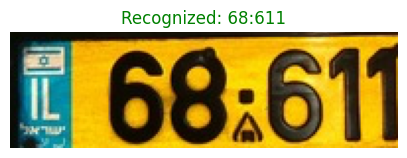

[2025/03/17 22:30:17] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.02636265754699707
[2025/03/17 22:30:17] ppocr DEBUG: cls num  : 1, elapsed : 0.013196468353271484
[2025/03/17 22:30:17] ppocr DEBUG: rec_res num  : 1, elapsed : 0.10210061073303223
PaddleOCR Text: 68:611-3


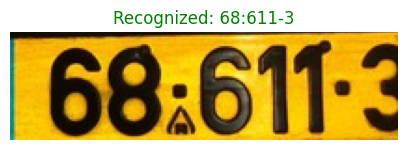

[2025/03/17 22:30:17] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.021648406982421875
[2025/03/17 22:30:17] ppocr DEBUG: cls num  : 1, elapsed : 0.01399087905883789
[2025/03/17 22:30:17] ppocr DEBUG: rec_res num  : 1, elapsed : 0.09973907470703125
PaddleOCR Text: :61136


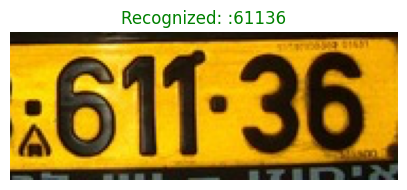

[2025/03/17 22:30:17] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.03942537307739258
[2025/03/17 22:30:17] ppocr DEBUG: cls num  : 1, elapsed : 0.014190196990966797
[2025/03/17 22:30:18] ppocr DEBUG: rec_res num  : 1, elapsed : 0.20874595642089844
PaddleOCR Text: 68:611-36


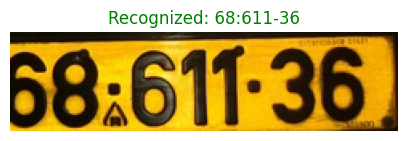

Processing: /content/extracted_images/images ocr/Cars244.png

0: 480x640 2 licences, 2832.4ms
Speed: 9.7ms preprocess, 2832.4ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)
[2025/03/17 22:30:21] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.1619129180908203
[2025/03/17 22:30:21] ppocr DEBUG: cls num  : 1, elapsed : 0.01529073715209961
[2025/03/17 22:30:21] ppocr DEBUG: rec_res num  : 1, elapsed : 0.26497387886047363
PaddleOCR Text: 21:801


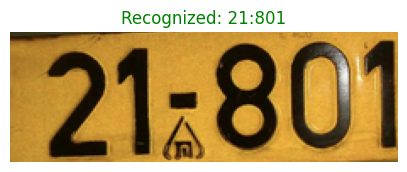

[2025/03/17 22:30:21] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.05887603759765625
[2025/03/17 22:30:21] ppocr DEBUG: cls num  : 1, elapsed : 0.013303995132446289
[2025/03/17 22:30:22] ppocr DEBUG: rec_res num  : 1, elapsed : 0.10141420364379883
PaddleOCR Text: 1:801-27


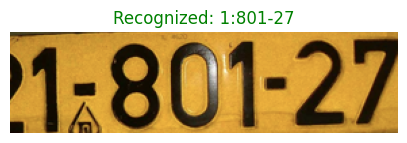

Processing: /content/extracted_images/images ocr/Cars1.png

0: 416x640 1 licence, 1314.7ms
Speed: 5.9ms preprocess, 1314.7ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 640)
[2025/03/17 22:30:23] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.019730329513549805
[2025/03/17 22:30:23] ppocr DEBUG: cls num  : 1, elapsed : 0.014407873153686523
[2025/03/17 22:30:23] ppocr DEBUG: rec_res num  : 1, elapsed : 0.15080690383911133
PaddleOCR Text: PGMN112


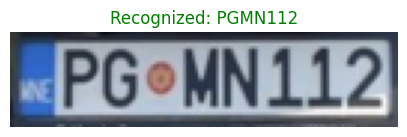

Processing: /content/extracted_images/images ocr/Cars235.png

0: 384x640 1 licence, 1360.3ms
Speed: 4.5ms preprocess, 1360.3ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)
[2025/03/17 22:30:25] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.030451536178588867
[2025/03/17 22:30:25] ppocr DEBUG: cls num  : 1, elapsed : 0.015151023864746094
[2025/03/17 22:30:25] ppocr DEBUG: rec_res num  : 1, elapsed : 0.10646915435791016
PaddleOCR Text: GJ03JL0126


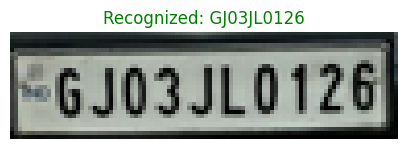

Processing: /content/extracted_images/images ocr/Cars186.png

0: 384x640 1 licence, 1130.3ms
Speed: 4.3ms preprocess, 1130.3ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)
[2025/03/17 22:30:26] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.018448829650878906
[2025/03/17 22:30:26] ppocr DEBUG: cls num  : 1, elapsed : 0.01297140121459961
[2025/03/17 22:30:27] ppocr DEBUG: rec_res num  : 1, elapsed : 0.09546232223510742
PaddleOCR Text: 26-SPF-4


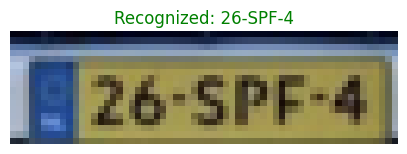

Processing: /content/extracted_images/images ocr/Cars50.png

0: 384x640 2 licences, 1204.5ms
Speed: 4.7ms preprocess, 1204.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)
[2025/03/17 22:30:28] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.1890125274658203
[2025/03/17 22:30:28] ppocr DEBUG: cls num  : 1, elapsed : 0.014078855514526367
[2025/03/17 22:30:28] ppocr DEBUG: rec_res num  : 1, elapsed : 0.1171579360961914
PaddleOCR Text: PUI8 BES


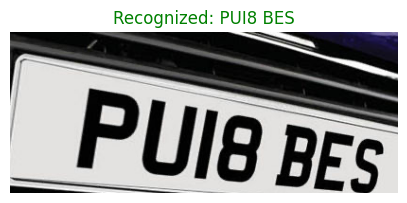

[2025/03/17 22:30:29] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.16889023780822754
[2025/03/17 22:30:29] ppocr DEBUG: cls num  : 1, elapsed : 0.01790475845336914
[2025/03/17 22:30:29] ppocr DEBUG: rec_res num  : 1, elapsed : 0.12250185012817383
PaddleOCR Text: PUI8 BES


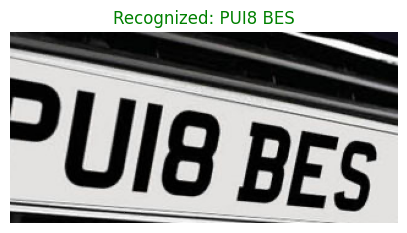

Processing: /content/extracted_images/images ocr/Cars177.png

0: 384x640 1 licence, 1301.4ms
Speed: 6.4ms preprocess, 1301.4ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)
[2025/03/17 22:30:30] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.017896652221679688
[2025/03/17 22:30:30] ppocr DEBUG: cls num  : 1, elapsed : 0.012985467910766602
[2025/03/17 22:30:30] ppocr DEBUG: rec_res num  : 1, elapsed : 0.1062009334564209
PaddleOCR Text: GOOD


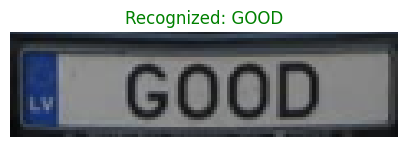

Processing: /content/extracted_images/images ocr/Cars175.png

0: 480x640 1 licence, 1880.0ms
Speed: 7.7ms preprocess, 1880.0ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)
[2025/03/17 22:30:33] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.10934019088745117
[2025/03/17 22:30:33] ppocr DEBUG: cls num  : 1, elapsed : 0.015184164047241211
[2025/03/17 22:30:33] ppocr DEBUG: rec_res num  : 1, elapsed : 0.10651493072509766
PaddleOCR Text: DL : 1N 42 68


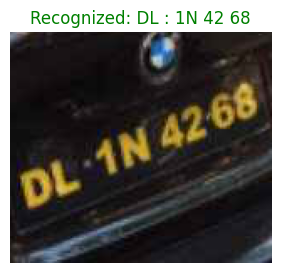

Processing: /content/extracted_images/images ocr/Cars165.png

0: 384x640 1 licence, 1804.7ms
Speed: 4.8ms preprocess, 1804.7ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)
[2025/03/17 22:30:35] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.02314591407775879
[2025/03/17 22:30:35] ppocr DEBUG: cls num  : 1, elapsed : 0.016298532485961914
[2025/03/17 22:30:35] ppocr DEBUG: rec_res num  : 1, elapsed : 0.09632062911987305
PaddleOCR Text: TH2AU1153


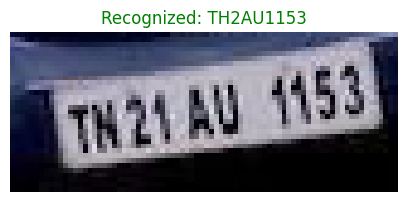

Processing: /content/extracted_images/images ocr/Cars96.png

0: 416x640 1 licence, 1471.8ms
Speed: 4.2ms preprocess, 1471.8ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 640)
[2025/03/17 22:30:36] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.01882648468017578
[2025/03/17 22:30:36] ppocr DEBUG: cls num  : 1, elapsed : 0.014520406723022461
[2025/03/17 22:30:37] ppocr DEBUG: rec_res num  : 1, elapsed : 0.09923887252807617
PaddleOCR Text: PGMN112


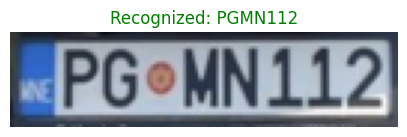

Processing: /content/extracted_images/images ocr/Cars7.png

0: 448x640 1 licence, 1372.9ms
Speed: 5.1ms preprocess, 1372.9ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)
[2025/03/17 22:30:38] ppocr DEBUG: dt_boxes num : 0, elapsed : 0.07796120643615723
[2025/03/17 22:30:38] ppocr DEBUG: cls num  : 0, elapsed : 0
[2025/03/17 22:30:38] ppocr DEBUG: rec_res num  : 0, elapsed : 2.1457672119140625e-06
PaddleOCR Text: 


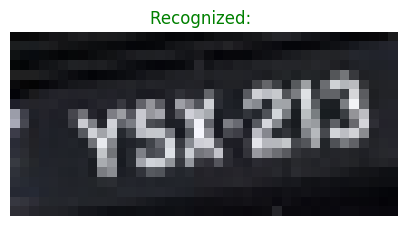

Processing: /content/extracted_images/images ocr/Cars191.png

0: 416x640 1 licence, 1372.1ms
Speed: 4.9ms preprocess, 1372.1ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 640)
[2025/03/17 22:30:40] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.0302889347076416
[2025/03/17 22:30:40] ppocr DEBUG: cls num  : 1, elapsed : 0.0226593017578125
[2025/03/17 22:30:40] ppocr DEBUG: rec_res num  : 1, elapsed : 0.1149148941040039
PaddleOCR Text: A03AB 3380


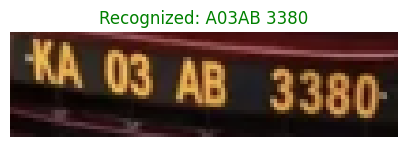

Processing: /content/extracted_images/images ocr/Cars21.png

0: 512x640 1 licence, 1664.8ms
Speed: 6.6ms preprocess, 1664.8ms inference, 1.3ms postprocess per image at shape (1, 3, 512, 640)
[2025/03/17 22:30:42] ppocr DEBUG: dt_boxes num : 0, elapsed : 0.017218589782714844
[2025/03/17 22:30:42] ppocr DEBUG: cls num  : 0, elapsed : 0
[2025/03/17 22:30:42] ppocr DEBUG: rec_res num  : 0, elapsed : 1.9073486328125e-06
PaddleOCR Text: 


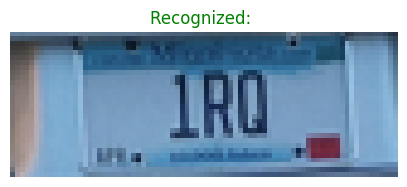

Processing: /content/extracted_images/images ocr/Cars74.png

0: 448x640 1 licence, 1474.2ms
Speed: 6.1ms preprocess, 1474.2ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)
[2025/03/17 22:30:43] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.02107691764831543
[2025/03/17 22:30:43] ppocr DEBUG: cls num  : 1, elapsed : 0.014178037643432617
[2025/03/17 22:30:44] ppocr DEBUG: rec_res num  : 1, elapsed : 0.10103178024291992
PaddleOCR Text: CZI7 KOD


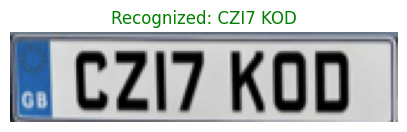

Processing: /content/extracted_images/images ocr/Cars183.png

0: 384x640 1 licence, 1388.6ms
Speed: 4.4ms preprocess, 1388.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)
[2025/03/17 22:30:45] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.019922971725463867
[2025/03/17 22:30:45] ppocr DEBUG: cls num  : 1, elapsed : 0.013943910598754883
[2025/03/17 22:30:45] ppocr DEBUG: rec_res num  : 1, elapsed : 0.2349720001220703
PaddleOCR Text: BRIT 0001


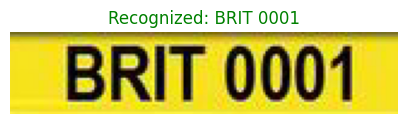

Processing: /content/extracted_images/images ocr/Cars130.png

0: 448x640 1 licence, 1950.6ms
Speed: 6.7ms preprocess, 1950.6ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)
[2025/03/17 22:30:48] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.027858257293701172
[2025/03/17 22:30:48] ppocr DEBUG: cls num  : 1, elapsed : 0.01902461051940918
[2025/03/17 22:30:48] ppocr DEBUG: rec_res num  : 1, elapsed : 0.12217402458190918
PaddleOCR Text: R268R9044


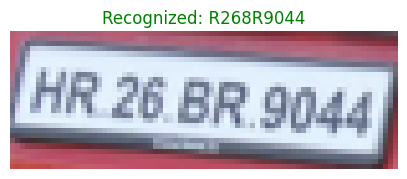

Processing: /content/extracted_images/images ocr/Cars9.png

0: 512x640 1 licence, 2462.3ms
Speed: 10.9ms preprocess, 2462.3ms inference, 1.2ms postprocess per image at shape (1, 3, 512, 640)
[2025/03/17 22:30:50] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.018587827682495117
[2025/03/17 22:30:50] ppocr DEBUG: cls num  : 1, elapsed : 0.013973236083984375
[2025/03/17 22:30:51] ppocr DEBUG: rec_res num  : 1, elapsed : 0.1137380599975586
PaddleOCR Text: MHO1AY8866


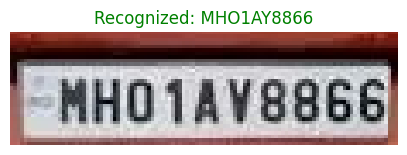

Processing: /content/extracted_images/images ocr/Cars15.png

0: 448x640 1 licence, 1318.7ms
Speed: 6.4ms preprocess, 1318.7ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)
[2025/03/17 22:30:52] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.017479658126831055
[2025/03/17 22:30:52] ppocr DEBUG: cls num  : 1, elapsed : 0.013962268829345703
[2025/03/17 22:30:52] ppocr DEBUG: rec_res num  : 1, elapsed : 0.10344696044921875
PaddleOCR Text: 


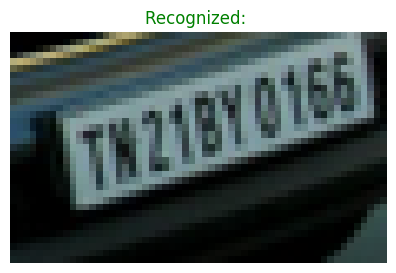

Processing: /content/extracted_images/images ocr/Cars233.png

0: 256x640 1 licence, 822.8ms
Speed: 2.9ms preprocess, 822.8ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 640)
[2025/03/17 22:30:53] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.017515897750854492
[2025/03/17 22:30:53] ppocr DEBUG: cls num  : 1, elapsed : 0.013231754302978516
[2025/03/17 22:30:53] ppocr DEBUG: rec_res num  : 1, elapsed : 0.10412192344665527
PaddleOCR Text: 


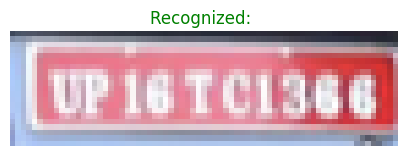

Processing: /content/extracted_images/images ocr/Cars57.png

0: 384x640 1 licence, 1192.6ms
Speed: 4.5ms preprocess, 1192.6ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)
[2025/03/17 22:30:55] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.01694965362548828
[2025/03/17 22:30:55] ppocr DEBUG: cls num  : 1, elapsed : 0.012943029403686523
[2025/03/17 22:30:55] ppocr DEBUG: rec_res num  : 1, elapsed : 0.0971822738647461
PaddleOCR Text: BKWL -324


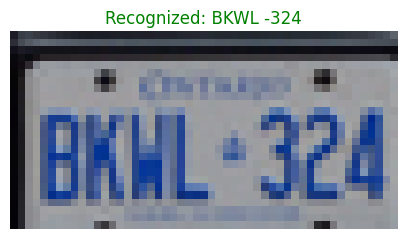

Processing: /content/extracted_images/images ocr/Cars255.png

0: 448x640 1 licence, 1358.4ms
Speed: 8.6ms preprocess, 1358.4ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)
[2025/03/17 22:30:56] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.018303394317626953
[2025/03/17 22:30:56] ppocr DEBUG: cls num  : 1, elapsed : 0.013548612594604492
[2025/03/17 22:30:56] ppocr DEBUG: rec_res num  : 1, elapsed : 0.10212111473083496
PaddleOCR Text: MH 20 EJ0364


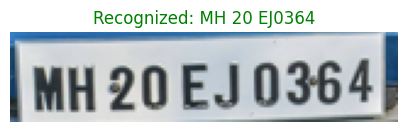

Processing: /content/extracted_images/images ocr/Cars82.png

0: 256x640 1 licence, 862.5ms
Speed: 4.5ms preprocess, 862.5ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)
[2025/03/17 22:30:57] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.01709604263305664
[2025/03/17 22:30:57] ppocr DEBUG: cls num  : 1, elapsed : 0.013479471206665039
[2025/03/17 22:30:57] ppocr DEBUG: rec_res num  : 1, elapsed : 0.1030588150024414
PaddleOCR Text: 


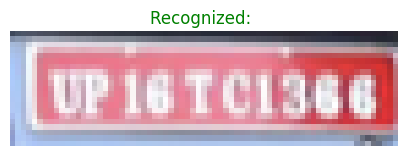

Processing: /content/extracted_images/images ocr/Cars36.png

0: 480x640 1 licence, 1441.9ms
Speed: 5.5ms preprocess, 1441.9ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)
[2025/03/17 22:30:59] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.01798105239868164
[2025/03/17 22:30:59] ppocr DEBUG: cls num  : 1, elapsed : 0.014558076858520508
[2025/03/17 22:30:59] ppocr DEBUG: rec_res num  : 1, elapsed : 0.12490510940551758
PaddleOCR Text: MIDLYPH


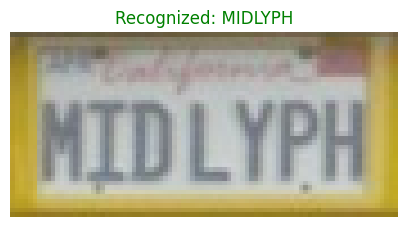

Processing: /content/extracted_images/images ocr/Cars60.png

0: 480x640 4 licences, 1619.6ms
Speed: 6.2ms preprocess, 1619.6ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)
[2025/03/17 22:31:01] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.0511319637298584
[2025/03/17 22:31:01] ppocr DEBUG: cls num  : 1, elapsed : 0.0153961181640625
[2025/03/17 22:31:01] ppocr DEBUG: rec_res num  : 1, elapsed : 0.10105109214782715
PaddleOCR Text: US:8UZ


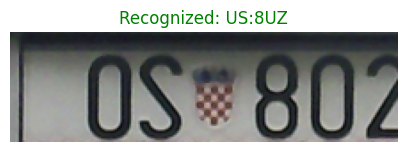

[2025/03/17 22:31:01] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.03647327423095703
[2025/03/17 22:31:01] ppocr DEBUG: cls num  : 1, elapsed : 0.01370859146118164
[2025/03/17 22:31:01] ppocr DEBUG: rec_res num  : 1, elapsed : 0.09707260131835938
PaddleOCR Text: 802-HN


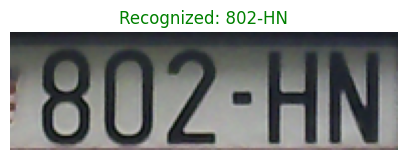

[2025/03/17 22:31:02] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.03745555877685547
[2025/03/17 22:31:02] ppocr DEBUG: cls num  : 1, elapsed : 0.01510167121887207
[2025/03/17 22:31:02] ppocr DEBUG: rec_res num  : 1, elapsed : 0.10184502601623535
PaddleOCR Text: US:802-H


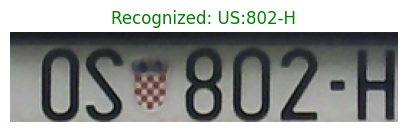

[2025/03/17 22:31:02] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.028690814971923828
[2025/03/17 22:31:02] ppocr DEBUG: cls num  : 1, elapsed : 0.014223575592041016
[2025/03/17 22:31:02] ppocr DEBUG: rec_res num  : 1, elapsed : 0.20116782188415527
PaddleOCR Text: S802-HN7


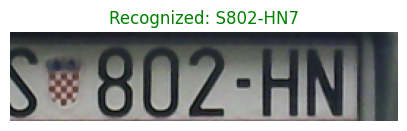

Processing: /content/extracted_images/images ocr/Cars94.png

0: 512x640 1 licence, 2194.0ms
Speed: 5.4ms preprocess, 2194.0ms inference, 1.9ms postprocess per image at shape (1, 3, 512, 640)
[2025/03/17 22:31:04] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.017306089401245117
[2025/03/17 22:31:04] ppocr DEBUG: cls num  : 1, elapsed : 0.015027046203613281
[2025/03/17 22:31:05] ppocr DEBUG: rec_res num  : 1, elapsed : 0.12789511680603027
PaddleOCR Text: NBEYOND


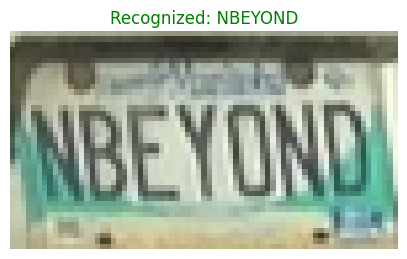

Processing: /content/extracted_images/images ocr/Cars145.png

0: 448x640 1 licence, 1793.3ms
Speed: 6.2ms preprocess, 1793.3ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)
[2025/03/17 22:31:07] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.018241167068481445
[2025/03/17 22:31:07] ppocr DEBUG: cls num  : 1, elapsed : 0.01393580436706543
[2025/03/17 22:31:07] ppocr DEBUG: rec_res num  : 1, elapsed : 0.10375618934631348
PaddleOCR Text: CH01AN0001


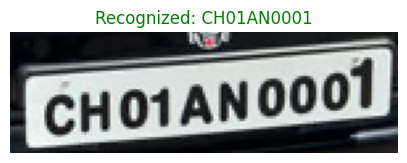

Processing: /content/extracted_images/images ocr/Cars125.png

0: 416x640 1 licence, 1226.8ms
Speed: 5.2ms preprocess, 1226.8ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 640)
[2025/03/17 22:31:08] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.08090567588806152
[2025/03/17 22:31:08] ppocr DEBUG: cls num  : 1, elapsed : 0.014058351516723633
[2025/03/17 22:31:08] ppocr DEBUG: rec_res num  : 1, elapsed : 0.10223388671875
PaddleOCR Text: 66887


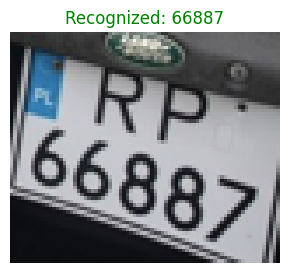

Processing: /content/extracted_images/images ocr/Cars32.png

0: 480x640 1 licence, 1479.4ms
Speed: 5.5ms preprocess, 1479.4ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)
[2025/03/17 22:31:10] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.01935601234436035
[2025/03/17 22:31:10] ppocr DEBUG: cls num  : 1, elapsed : 0.01642584800720215
[2025/03/17 22:31:10] ppocr DEBUG: rec_res num  : 1, elapsed : 0.10195660591125488
PaddleOCR Text: MANISA


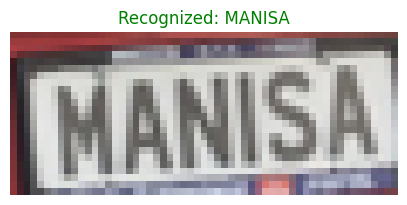

Processing: /content/extracted_images/images ocr/Cars252.png

0: 512x640 1 licence, 1550.9ms
Speed: 7.5ms preprocess, 1550.9ms inference, 1.2ms postprocess per image at shape (1, 3, 512, 640)
[2025/03/17 22:31:12] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.019122600555419922
[2025/03/17 22:31:12] ppocr DEBUG: cls num  : 1, elapsed : 0.014517545700073242
[2025/03/17 22:31:12] ppocr DEBUG: rec_res num  : 1, elapsed : 0.0995790958404541
PaddleOCR Text: DAN 54P


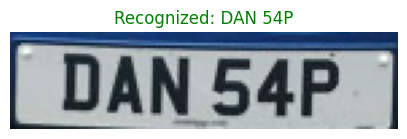

Processing: /content/extracted_images/images ocr/Cars123.png

0: 480x640 1 licence, 1449.8ms
Speed: 5.0ms preprocess, 1449.8ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)
[2025/03/17 22:31:13] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.018527507781982422
[2025/03/17 22:31:13] ppocr DEBUG: cls num  : 1, elapsed : 0.015268564224243164
[2025/03/17 22:31:14] ppocr DEBUG: rec_res num  : 1, elapsed : 0.10061311721801758
PaddleOCR Text: HR 26 8C 5SI4


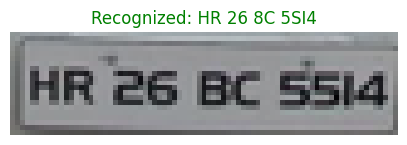

Processing: /content/extracted_images/images ocr/Cars192.png

0: 480x640 1 licence, 1434.1ms
Speed: 4.9ms preprocess, 1434.1ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)
[2025/03/17 22:31:15] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.02834916114807129
[2025/03/17 22:31:15] ppocr DEBUG: cls num  : 1, elapsed : 0.014632463455200195
[2025/03/17 22:31:15] ppocr DEBUG: rec_res num  : 1, elapsed : 0.11912727355957031
PaddleOCR Text: E4 GLE


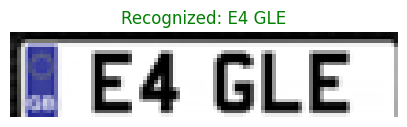

Processing: /content/extracted_images/images ocr/Cars45.png

0: 416x640 1 licence, 1659.9ms
Speed: 4.2ms preprocess, 1659.9ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 640)
[2025/03/17 22:31:17] ppocr DEBUG: dt_boxes num : 0, elapsed : 0.04063606262207031
[2025/03/17 22:31:17] ppocr DEBUG: cls num  : 0, elapsed : 0
[2025/03/17 22:31:17] ppocr DEBUG: rec_res num  : 0, elapsed : 1.6689300537109375e-06
PaddleOCR Text: 


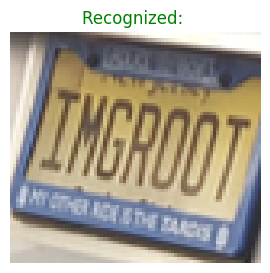

Processing: /content/extracted_images/images ocr/Cars193.png

0: 448x640 1 licence, 1890.0ms
Speed: 6.6ms preprocess, 1890.0ms inference, 1.9ms postprocess per image at shape (1, 3, 448, 640)
[2025/03/17 22:31:19] ppocr DEBUG: dt_boxes num : 0, elapsed : 0.019661903381347656
[2025/03/17 22:31:19] ppocr DEBUG: cls num  : 0, elapsed : 0
[2025/03/17 22:31:19] ppocr DEBUG: rec_res num  : 0, elapsed : 2.384185791015625e-06
PaddleOCR Text: 


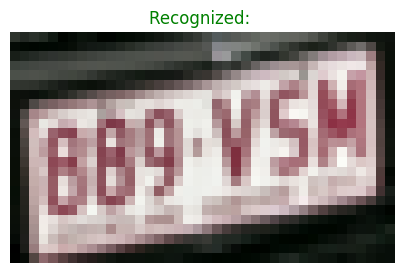

Processing: /content/extracted_images/images ocr/Cars225.png

0: 416x640 1 licence, 1729.4ms
Speed: 5.3ms preprocess, 1729.4ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 640)
[2025/03/17 22:31:21] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.03435039520263672
[2025/03/17 22:31:21] ppocr DEBUG: cls num  : 1, elapsed : 0.013770341873168945
[2025/03/17 22:31:21] ppocr DEBUG: rec_res num  : 1, elapsed : 0.10280990600585938
PaddleOCR Text: JA62 UAR


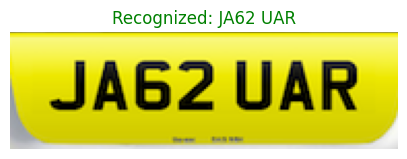

Processing: /content/extracted_images/images ocr/Cars118.png

0: 416x640 1 licence, 1342.6ms
Speed: 5.2ms preprocess, 1342.6ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 640)
[2025/03/17 22:31:23] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.023799896240234375
[2025/03/17 22:31:23] ppocr DEBUG: cls num  : 1, elapsed : 0.016133785247802734
[2025/03/17 22:31:23] ppocr DEBUG: rec_res num  : 1, elapsed : 0.12067461013793945
PaddleOCR Text: JA62 UAR


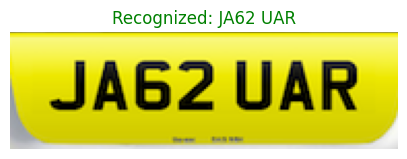

Processing: /content/extracted_images/images ocr/Cars230.png

0: 384x640 1 licence, 1360.3ms
Speed: 9.6ms preprocess, 1360.3ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)
[2025/03/17 22:31:24] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.01990532875061035
[2025/03/17 22:31:24] ppocr DEBUG: cls num  : 1, elapsed : 0.013493061065673828
[2025/03/17 22:31:24] ppocr DEBUG: rec_res num  : 1, elapsed : 0.10824990272521973
PaddleOCR Text: L.R33 TEE


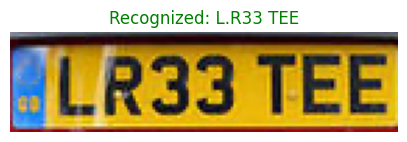

Processing: /content/extracted_images/images ocr/Cars73.png

0: 384x640 1 licence, 1207.5ms
Speed: 4.3ms preprocess, 1207.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)
[2025/03/17 22:31:26] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.020366668701171875
[2025/03/17 22:31:26] ppocr DEBUG: cls num  : 1, elapsed : 0.013393163681030273
[2025/03/17 22:31:26] ppocr DEBUG: rec_res num  : 1, elapsed : 0.1119375228881836
PaddleOCR Text: tN 99 F 2378


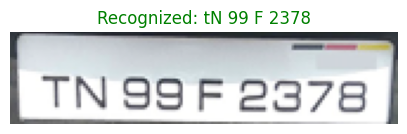

Processing: /content/extracted_images/images ocr/Cars4.png

0: 384x640 2 licences, 1223.6ms
Speed: 5.0ms preprocess, 1223.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)
[2025/03/17 22:31:28] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.19633269309997559
[2025/03/17 22:31:28] ppocr DEBUG: cls num  : 1, elapsed : 0.014061212539672852
[2025/03/17 22:31:28] ppocr DEBUG: rec_res num  : 1, elapsed : 0.1042168140411377
PaddleOCR Text: PUI8 BES


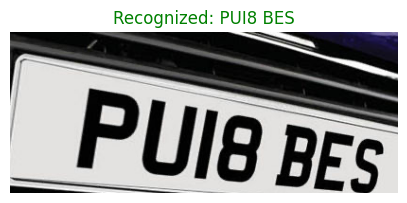

[2025/03/17 22:31:28] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.18522953987121582
[2025/03/17 22:31:28] ppocr DEBUG: cls num  : 1, elapsed : 0.014631509780883789
[2025/03/17 22:31:28] ppocr DEBUG: rec_res num  : 1, elapsed : 0.13640737533569336
PaddleOCR Text: PUI8 BES


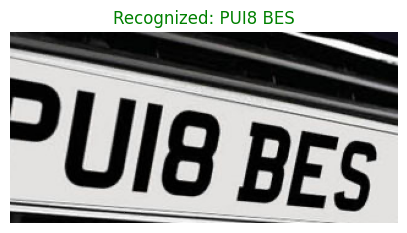

Processing: /content/extracted_images/images ocr/Cars156.png

0: 320x640 1 licence, 989.4ms
Speed: 3.6ms preprocess, 989.4ms inference, 1.2ms postprocess per image at shape (1, 3, 320, 640)
[2025/03/17 22:31:29] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.018051862716674805
[2025/03/17 22:31:29] ppocr DEBUG: cls num  : 1, elapsed : 0.016524314880371094
[2025/03/17 22:31:29] ppocr DEBUG: rec_res num  : 1, elapsed : 0.11012697219848633
PaddleOCR Text: PRIV ATE


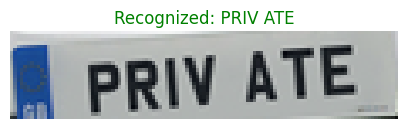

Processing: /content/extracted_images/images ocr/Cars234.png

0: 384x640 1 licence, 1371.5ms
Speed: 4.1ms preprocess, 1371.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)
[2025/03/17 22:31:31] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.04322481155395508
[2025/03/17 22:31:31] ppocr DEBUG: cls num  : 1, elapsed : 0.017064809799194336
[2025/03/17 22:31:32] ppocr DEBUG: rec_res num  : 1, elapsed : 0.6176767349243164
PaddleOCR Text: Im4U 555


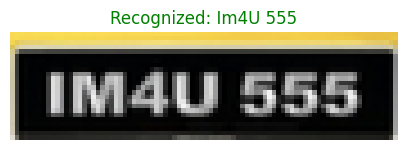

Processing: /content/extracted_images/images ocr/Cars247.png

0: 384x640 1 licence, 3535.6ms
Speed: 3.6ms preprocess, 3535.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)
[2025/03/17 22:31:36] ppocr DEBUG: dt_boxes num : 3, elapsed : 0.23122286796569824
[2025/03/17 22:31:36] ppocr DEBUG: cls num  : 3, elapsed : 0.30995607376098633
[2025/03/17 22:31:39] ppocr DEBUG: rec_res num  : 3, elapsed : 2.5296339988708496
PaddleOCR Text: TN 37 CS  765


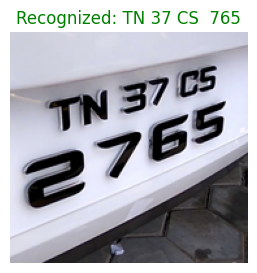

Processing: /content/extracted_images/images ocr/Cars72.png

0: 544x640 1 licence, 3023.0ms
Speed: 10.5ms preprocess, 3023.0ms inference, 1.3ms postprocess per image at shape (1, 3, 544, 640)
[2025/03/17 22:31:42] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.05498671531677246
[2025/03/17 22:31:42] ppocr DEBUG: cls num  : 1, elapsed : 0.014734745025634766
[2025/03/17 22:31:42] ppocr DEBUG: rec_res num  : 1, elapsed : 0.09834861755371094
PaddleOCR Text: DL7C N 5617


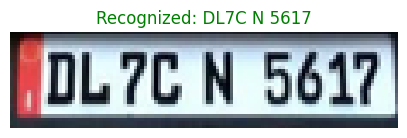

Processing: /content/extracted_images/images ocr/Cars147.png

0: 352x640 1 licence, 1365.0ms
Speed: 4.2ms preprocess, 1365.0ms inference, 1.6ms postprocess per image at shape (1, 3, 352, 640)
[2025/03/17 22:31:44] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.053595781326293945
[2025/03/17 22:31:44] ppocr DEBUG: cls num  : 1, elapsed : 0.028664588928222656
[2025/03/17 22:31:44] ppocr DEBUG: rec_res num  : 1, elapsed : 0.12935805320739746
PaddleOCR Text: KLG1CA2555


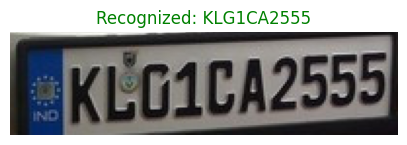

Processing: /content/extracted_images/images ocr/Cars152.png

0: 416x640 1 licence, 1566.4ms
Speed: 5.2ms preprocess, 1566.4ms inference, 2.5ms postprocess per image at shape (1, 3, 416, 640)
[2025/03/17 22:31:46] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.06210684776306152
[2025/03/17 22:31:46] ppocr DEBUG: cls num  : 1, elapsed : 0.03006148338317871
[2025/03/17 22:31:46] ppocr DEBUG: rec_res num  : 1, elapsed : 0.15009689331054688
PaddleOCR Text: DL49 AK49


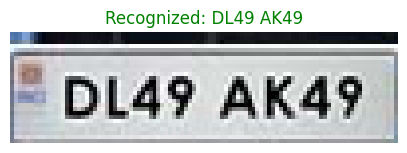

Processing: /content/extracted_images/images ocr/Cars257.png

0: 480x640 1 licence, 1618.6ms
Speed: 5.8ms preprocess, 1618.6ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)
[2025/03/17 22:31:48] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.0175321102142334
[2025/03/17 22:31:48] ppocr DEBUG: cls num  : 1, elapsed : 0.01259613037109375
[2025/03/17 22:31:48] ppocr DEBUG: rec_res num  : 1, elapsed : 0.10672855377197266
PaddleOCR Text: OK LA


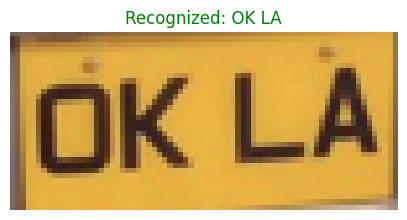

Processing: /content/extracted_images/images ocr/Cars86.png

0: 384x640 1 licence, 1574.2ms
Speed: 4.9ms preprocess, 1574.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)
[2025/03/17 22:31:50] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.018721818923950195
[2025/03/17 22:31:50] ppocr DEBUG: cls num  : 1, elapsed : 0.013665914535522461
[2025/03/17 22:31:50] ppocr DEBUG: rec_res num  : 1, elapsed : 0.1056051254272461
PaddleOCR Text: H140X9937


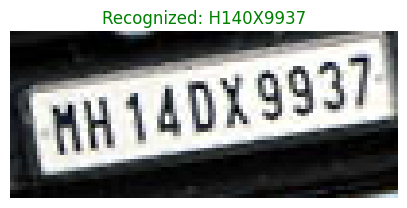

Processing: /content/extracted_images/images ocr/Cars31.png

0: 416x640 1 licence, 1523.7ms
Speed: 6.8ms preprocess, 1523.7ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 640)
[2025/03/17 22:31:51] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.01878976821899414
[2025/03/17 22:31:51] ppocr DEBUG: cls num  : 1, elapsed : 0.015601158142089844
[2025/03/17 22:31:52] ppocr DEBUG: rec_res num  : 1, elapsed : 0.09763336181640625
PaddleOCR Text: YD63 LB


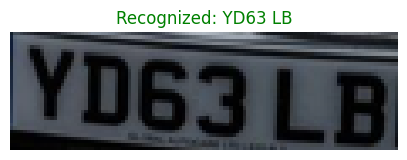

Processing: /content/extracted_images/images ocr/Cars222.png

0: 384x640 1 licence, 2069.5ms
Speed: 13.3ms preprocess, 2069.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)
[2025/03/17 22:31:54] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.027321338653564453
[2025/03/17 22:31:54] ppocr DEBUG: cls num  : 1, elapsed : 0.015977144241333008
[2025/03/17 22:31:54] ppocr DEBUG: rec_res num  : 1, elapsed : 0.10665321350097656
PaddleOCR Text: 26-SPF-4


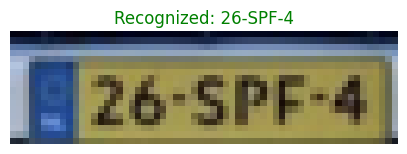

Processing: /content/extracted_images/images ocr/Cars85.png

0: 448x640 3 licences, 1896.8ms
Speed: 7.0ms preprocess, 1896.8ms inference, 1.7ms postprocess per image at shape (1, 3, 448, 640)
[2025/03/17 22:31:56] ppocr DEBUG: dt_boxes num : 0, elapsed : 0.02485179901123047
[2025/03/17 22:31:56] ppocr DEBUG: cls num  : 0, elapsed : 0
[2025/03/17 22:31:56] ppocr DEBUG: rec_res num  : 0, elapsed : 3.337860107421875e-06
PaddleOCR Text: 


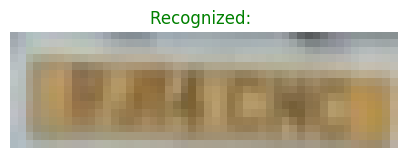

[2025/03/17 22:31:56] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.02396559715270996
[2025/03/17 22:31:56] ppocr DEBUG: cls num  : 1, elapsed : 0.016304492950439453
[2025/03/17 22:31:56] ppocr DEBUG: rec_res num  : 1, elapsed : 0.12586116790771484
PaddleOCR Text: YU63GTY


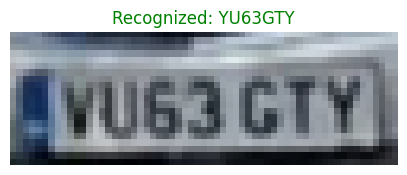

[2025/03/17 22:31:57] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.022556066513061523
[2025/03/17 22:31:57] ppocr DEBUG: cls num  : 1, elapsed : 0.02389049530029297
[2025/03/17 22:31:57] ppocr DEBUG: rec_res num  : 1, elapsed : 0.0999140739440918
PaddleOCR Text: YU63 GTY


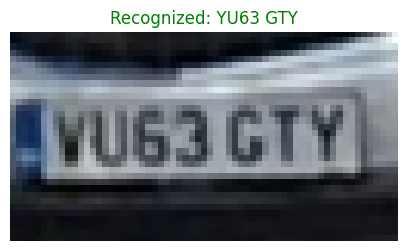

Processing: /content/extracted_images/images ocr/Cars58.png

0: 416x640 1 licence, 1836.0ms
Speed: 4.3ms preprocess, 1836.0ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 640)
[2025/03/17 22:31:59] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.01842021942138672
[2025/03/17 22:31:59] ppocr DEBUG: cls num  : 1, elapsed : 0.014670133590698242
[2025/03/17 22:31:59] ppocr DEBUG: rec_res num  : 1, elapsed : 0.10482645034790039
PaddleOCR Text: H01DB000


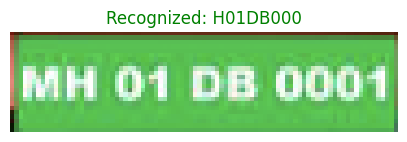

Processing: /content/extracted_images/images ocr/Cars187.png

0: 384x640 1 licence, 1398.2ms
Speed: 4.6ms preprocess, 1398.2ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)
[2025/03/17 22:32:00] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.07192349433898926
[2025/03/17 22:32:00] ppocr DEBUG: cls num  : 1, elapsed : 0.015605688095092773
[2025/03/17 22:32:01] ppocr DEBUG: rec_res num  : 1, elapsed : 0.13197851181030273
PaddleOCR Text: ALR 486


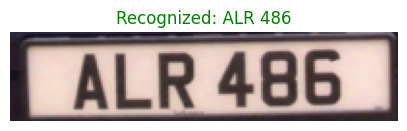

Processing: /content/extracted_images/images ocr/Cars239.png

0: 512x640 1 licence, 1527.4ms
Speed: 6.8ms preprocess, 1527.4ms inference, 1.7ms postprocess per image at shape (1, 3, 512, 640)
[2025/03/17 22:32:02] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.019385099411010742
[2025/03/17 22:32:02] ppocr DEBUG: cls num  : 1, elapsed : 0.014554023742675781
[2025/03/17 22:32:02] ppocr DEBUG: rec_res num  : 1, elapsed : 0.10234785079956055
PaddleOCR Text: 15-LK-10898


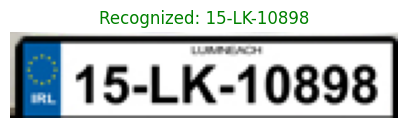

Processing: /content/extracted_images/images ocr/Cars104.png

0: 480x640 1 licence, 1868.7ms
Speed: 6.5ms preprocess, 1868.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)
[2025/03/17 22:32:04] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.020318031311035156
[2025/03/17 22:32:04] ppocr DEBUG: cls num  : 1, elapsed : 0.015774011611938477
[2025/03/17 22:32:05] ppocr DEBUG: rec_res num  : 1, elapsed : 0.19746756553649902
PaddleOCR Text: 


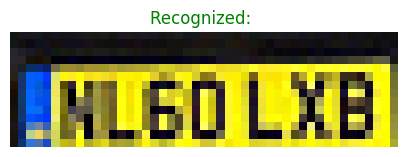

Processing: /content/extracted_images/images ocr/Cars44.png

0: 480x640 3 licences, 1462.1ms
Speed: 9.3ms preprocess, 1462.1ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)
[2025/03/17 22:32:06] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.1392819881439209
[2025/03/17 22:32:06] ppocr DEBUG: cls num  : 1, elapsed : 0.014723062515258789
[2025/03/17 22:32:06] ppocr DEBUG: rec_res num  : 1, elapsed : 0.10651755332946777
PaddleOCR Text: DL2C AG C


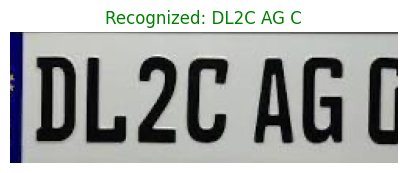

[2025/03/17 22:32:07] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.12508273124694824
[2025/03/17 22:32:07] ppocr DEBUG: cls num  : 1, elapsed : 0.0168912410736084
[2025/03/17 22:32:07] ppocr DEBUG: rec_res num  : 1, elapsed : 0.12998652458190918
PaddleOCR Text: C AG 0786


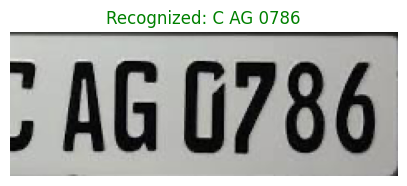

[2025/03/17 22:32:07] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.15560483932495117
[2025/03/17 22:32:07] ppocr DEBUG: cls num  : 1, elapsed : 0.017018795013427734
[2025/03/17 22:32:07] ppocr DEBUG: rec_res num  : 1, elapsed : 0.1014089584350586
PaddleOCR Text: DL2C AG O78


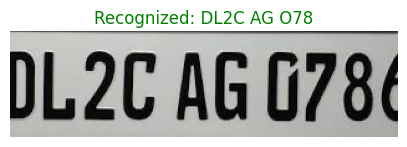

Processing: /content/extracted_images/images ocr/Cars84.png

0: 480x640 1 licence, 2108.4ms
Speed: 5.3ms preprocess, 2108.4ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)
[2025/03/17 22:32:10] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.01880931854248047
[2025/03/17 22:32:10] ppocr DEBUG: cls num  : 1, elapsed : 0.013512134552001953
[2025/03/17 22:32:10] ppocr DEBUG: rec_res num  : 1, elapsed : 0.10187602043151855
PaddleOCR Text: Hi55 369


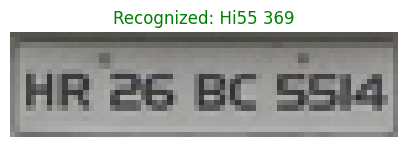

Processing: /content/extracted_images/images ocr/Cars69.png

0: 448x640 1 licence, 1964.6ms
Speed: 4.9ms preprocess, 1964.6ms inference, 6.0ms postprocess per image at shape (1, 3, 448, 640)
[2025/03/17 22:32:12] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.022052288055419922
[2025/03/17 22:32:12] ppocr DEBUG: cls num  : 1, elapsed : 0.020782470703125
[2025/03/17 22:32:12] ppocr DEBUG: rec_res num  : 1, elapsed : 0.1301112174987793
PaddleOCR Text: KD


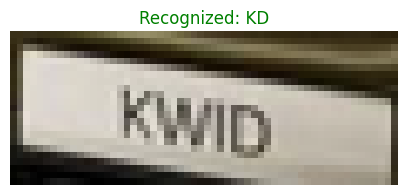

Processing: /content/extracted_images/images ocr/Cars120.png

0: 448x640 1 licence, 1865.5ms
Speed: 8.7ms preprocess, 1865.5ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)
[2025/03/17 22:32:14] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.028490543365478516
[2025/03/17 22:32:14] ppocr DEBUG: cls num  : 1, elapsed : 0.012794733047485352
[2025/03/17 22:32:14] ppocr DEBUG: rec_res num  : 1, elapsed : 0.09835410118103027
PaddleOCR Text: B2228HM


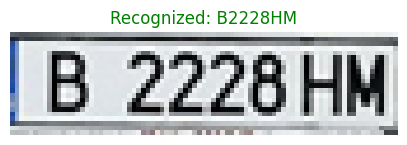

Processing: /content/extracted_images/images ocr/Cars108.png

0: 512x640 1 licence, 1652.3ms
Speed: 5.7ms preprocess, 1652.3ms inference, 1.3ms postprocess per image at shape (1, 3, 512, 640)
[2025/03/17 22:32:16] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.02024555206298828
[2025/03/17 22:32:16] ppocr DEBUG: cls num  : 1, elapsed : 0.013955354690551758
[2025/03/17 22:32:16] ppocr DEBUG: rec_res num  : 1, elapsed : 0.10376119613647461
PaddleOCR Text: MHO1AY8866


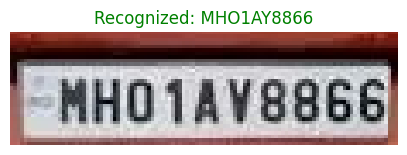

Processing: /content/extracted_images/images ocr/Cars197.png

0: 384x640 1 licence, 1370.3ms
Speed: 4.9ms preprocess, 1370.3ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)
[2025/03/17 22:32:17] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.019106149673461914
[2025/03/17 22:32:17] ppocr DEBUG: cls num  : 1, elapsed : 0.013660192489624023
[2025/03/17 22:32:18] ppocr DEBUG: rec_res num  : 1, elapsed : 0.11098527908325195
PaddleOCR Text: L.R33 TEE


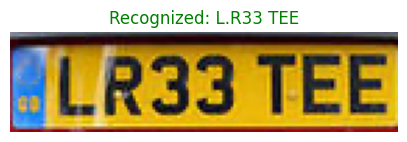

Processing: /content/extracted_images/images ocr/Cars265.png

0: 352x640 1 licence, 1207.5ms
Speed: 6.1ms preprocess, 1207.5ms inference, 0.9ms postprocess per image at shape (1, 3, 352, 640)
[2025/03/17 22:32:19] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.02229762077331543
[2025/03/17 22:32:19] ppocr DEBUG: cls num  : 1, elapsed : 0.013143301010131836
[2025/03/17 22:32:19] ppocr DEBUG: rec_res num  : 1, elapsed : 0.10259270668029785
PaddleOCR Text: M:771276


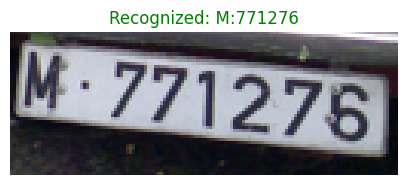

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO
from paddleocr import PaddleOCR
import os

# Set up PaddleOCR
ocr = PaddleOCR(use_angle_cls=True, lang="en")  # Initialize PaddleOCR

# Load YOLO model
model = YOLO("/content/best (1).pt")  # Change to your trained YOLO model

# Function to preprocess the cropped plate for better OCR
def preprocess_plate(plate):
    gray_plate = cv2.cvtColor(plate, cv2.COLOR_BGR2GRAY)
    # Apply bilateral filter to remove noise while keeping edges sharp
    filtered_plate = cv2.bilateralFilter(gray_plate, 11, 17, 17)
    _, binary_plate = cv2.threshold(filtered_plate, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return binary_plate

# Function to call PaddleOCR
def paddleocr_detection(image):
    result = ocr.ocr(image)
    if result and result[0]:
        return ' '.join([line[1][0] for line in result[0]])
    return ""

# Path to the folder containing images
folder_path = "/content/extracted_images/images ocr"

if not os.path.exists(folder_path):
    raise FileNotFoundError(f"The folder path {folder_path} does not exist.")

# Process each image in the folder
for filename in os.listdir(folder_path):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
        image_path = os.path.join(folder_path, filename)
        print(f"Processing: {image_path}")

        # Load the image
        image = cv2.imread(image_path)
        if image is None:
            print(f"Failed to load the image: {image_path}")
            continue

        # Run YOLO detection
        results = model(image)

        # Process each detected plate
        for result in results:
            for box in result.boxes:
                x1, y1, x2, y2 = map(int, box.xyxy[0])  # Get box coordinates
                cropped_plate = image[y1:y2, x1:x2]  # Crop plate region

                # Preprocess the plate image
                processed_plate = preprocess_plate(cropped_plate)

                # Run PaddleOCR
                plate_text = paddleocr_detection(processed_plate)

                print("PaddleOCR Text:", plate_text)

                # Display only the cropped plate with the text recognized
                plt.figure(figsize=(5, 3))
                plt.imshow(cv2.cvtColor(cropped_plate, cv2.COLOR_BGR2RGB))
                plt.title(f"Recognized: {plate_text}", fontsize=12, color='green')
                plt.axis("off")
                plt.show()


# EVALUATION D'OCR AVEC WORD ERROR RATE

[2025/03/18 00:18:48] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_l

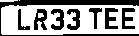

Processing: Cars184.png

0: 384x640 1 licence, 1470.8ms
Speed: 5.5ms preprocess, 1470.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)
[2025/03/18 00:18:55] ppocr DEBUG: dt_boxes num : 0, elapsed : 0.06619381904602051
[2025/03/18 00:18:55] ppocr DEBUG: cls num  : 0, elapsed : 0
[2025/03/18 00:18:55] ppocr DEBUG: rec_res num  : 0, elapsed : 2.1457672119140625e-06
Ground Truth: SWIFT
PaddleOCR: 
WER: 100.00%


Processing: Cars64.png

0: 448x640 2 licences, 1272.1ms
Speed: 4.1ms preprocess, 1272.1ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)
[2025/03/18 00:18:56] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.0699470043182373
[2025/03/18 00:18:56] ppocr DEBUG: cls num  : 1, elapsed : 0.011441230773925781
[2025/03/18 00:18:56] ppocr DEBUG: rec_res num  : 1, elapsed : 0.06799960136413574
Ground Truth: TAXI
PaddleOCR: TAXI
WER: 0.00%


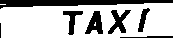

[2025/03/18 00:18:56] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.014886617660522461
[2025/03/18 00:18:56] ppocr DEBUG: cls num  : 1, elapsed : 0.011008024215698242
[2025/03/18 00:18:56] ppocr DEBUG: rec_res num  : 1, elapsed : 0.0638275146484375
Ground Truth: TAXI
PaddleOCR: TAX!
WER: 25.00%


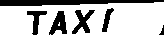

Processing: Cars226.png

0: 448x640 1 licence, 1089.5ms
Speed: 4.8ms preprocess, 1089.5ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)
[2025/03/18 00:18:57] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.013432502746582031
[2025/03/18 00:18:58] ppocr DEBUG: cls num  : 1, elapsed : 0.010771751403808594
[2025/03/18 00:18:58] ppocr DEBUG: rec_res num  : 1, elapsed : 0.06386804580688477
Ground Truth: TN 19 S 4523
PaddleOCR: T19S4523
WER: 33.33%


Processing: Cars24.png

0: 480x640 1 licence, 1196.7ms
Speed: 4.8ms preprocess, 1196.7ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)
[2025/03/18 00:18:59] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.014329910278320312
[2025/03/18 00:18:59] ppocr DEBUG: cls num  : 1, elapsed : 0.011453390121459961
[2025/03/18 00:18:59] ppocr DEBUG: rec_res num  : 1, elapsed : 0.06156754493713379
Ground Truth: HR 26 BC 5514
PaddleOCR: Hi55 369
WER: 84.62%


Processing: Cars33.png

0: 384x640 2 licences, 957.8ms
Speed: 4.1ms preprocess, 957.8ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)
[2025/03/18 00:19:00] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.08184814453125
[2025/03/18 00:19:00] ppocr DEBUG: cls num  : 1, elapsed : 0.010778427124023438
[2025/03/18 00:19:00] ppocr DEBUG: rec_res num  : 1, elapsed : 0.06375622749328613
Ground Truth: OX65 AWD
PaddleOCR: 0X65 AWD
WER: 12.50%


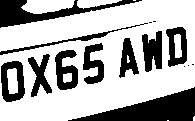

[2025/03/18 00:19:00] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.10177063941955566
[2025/03/18 00:19:00] ppocr DEBUG: cls num  : 1, elapsed : 0.012102365493774414
[2025/03/18 00:19:00] ppocr DEBUG: rec_res num  : 1, elapsed : 0.06603598594665527
Ground Truth: OX65 AWD
PaddleOCR: OX65 AWD
WER: 0.00%


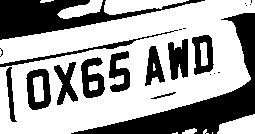

Processing: Cars53.png

0: 480x640 1 licence, 1179.4ms
Speed: 5.0ms preprocess, 1179.4ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)
[2025/03/18 00:19:01] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.016193628311157227
[2025/03/18 00:19:01] ppocr DEBUG: cls num  : 1, elapsed : 0.011327743530273438
[2025/03/18 00:19:02] ppocr DEBUG: rec_res num  : 1, elapsed : 0.06388497352600098
Ground Truth: CHIO OSE
PaddleOCR: CHIO OSE
WER: 0.00%


Processing: Cars245.png

0: 448x640 1 licence, 1074.2ms
Speed: 4.8ms preprocess, 1074.2ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)
[2025/03/18 00:19:03] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.017673730850219727
[2025/03/18 00:19:03] ppocr DEBUG: cls num  : 1, elapsed : 0.011623144149780273
[2025/03/18 00:19:03] ppocr DEBUG: rec_res num  : 1, elapsed : 0.05914735794067383
Ground Truth: HR 26 BR 9044
PaddleOCR: R268R9044
WER: 38.46%


Processing: Cars56.png

0: 320x640 (no detections), 807.7ms
Speed: 3.4ms preprocess, 807.7ms inference, 0.6ms postprocess per image at shape (1, 3, 320, 640)
Processing: Cars231.png

0: 448x640 1 licence, 1078.2ms
Speed: 5.0ms preprocess, 1078.2ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)
[2025/03/18 00:19:05] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.01532745361328125
[2025/03/18 00:19:05] ppocr DEBUG: cls num  : 1, elapsed : 0.011187314987182617
[2025/03/18 00:19:05] ppocr DEBUG: rec_res num  : 1, elapsed : 0.0609278678894043
Ground Truth: GB18 TCE
PaddleOCR: GBIB TCE
WER: 25.00%


Processing: Cars101.png

0: 480x640 1 licence, 1556.5ms
Speed: 5.1ms preprocess, 1556.5ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)
[2025/03/18 00:19:06] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.02442336082458496
[2025/03/18 00:19:06] ppocr DEBUG: cls num  : 1, elapsed : 0.01590561866760254
[2025/03/18 00:19:07] ppocr DEBUG: rec_res num  : 1, elapsed : 0.09106612205505371
Ground Truth: HR 26 BC 5514
PaddleOCR: Hi55 369
WER: 84.62%


Processing: Cars128.png

0: 384x640 2 licences, 1468.4ms
Speed: 4.7ms preprocess, 1468.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)
[2025/03/18 00:19:08] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.03454899787902832
[2025/03/18 00:19:08] ppocr DEBUG: cls num  : 1, elapsed : 0.016403913497924805
[2025/03/18 00:19:08] ppocr DEBUG: rec_res num  : 1, elapsed : 0.09971284866333008
Ground Truth: OX65 AWD
PaddleOCR: 0X65 AWD
WER: 12.50%


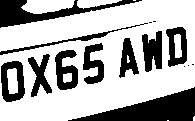

[2025/03/18 00:19:08] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.03523087501525879
[2025/03/18 00:19:08] ppocr DEBUG: cls num  : 1, elapsed : 0.014745950698852539
[2025/03/18 00:19:08] ppocr DEBUG: rec_res num  : 1, elapsed : 0.10856461524963379
Ground Truth: OX65 AWD
PaddleOCR: OX65 AWD
WER: 0.00%


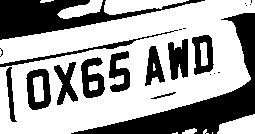

Processing: Cars39.png

0: 480x640 1 licence, 1295.0ms
Speed: 4.9ms preprocess, 1295.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
[2025/03/18 00:19:10] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.023116350173950195
[2025/03/18 00:19:10] ppocr DEBUG: cls num  : 1, elapsed : 0.012291669845581055
[2025/03/18 00:19:10] ppocr DEBUG: rec_res num  : 1, elapsed : 0.061118364334106445
Ground Truth: MH15BD8877
PaddleOCR: MH15808877
WER: 20.00%


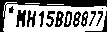

Processing: Cars167.png

0: 512x640 1 licence, 1290.2ms
Speed: 5.4ms preprocess, 1290.2ms inference, 1.0ms postprocess per image at shape (1, 3, 512, 640)
[2025/03/18 00:19:11] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.017106056213378906
[2025/03/18 00:19:11] ppocr DEBUG: cls num  : 1, elapsed : 0.013155698776245117
[2025/03/18 00:19:11] ppocr DEBUG: rec_res num  : 1, elapsed : 0.0623471736907959
Ground Truth: 15 LK 10898
PaddleOCR: 15-LK-10898
WER: 18.18%


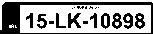

Processing: Cars159.png

0: 544x640 1 licence, 1388.5ms
Speed: 5.9ms preprocess, 1388.5ms inference, 1.1ms postprocess per image at shape (1, 3, 544, 640)
[2025/03/18 00:19:13] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.019804954528808594
[2025/03/18 00:19:13] ppocr DEBUG: cls num  : 1, elapsed : 0.01165628433227539
[2025/03/18 00:19:13] ppocr DEBUG: rec_res num  : 1, elapsed : 0.061516761779785156
Ground Truth: DL 7C N 5617
PaddleOCR: DL7C N 5617
WER: 8.33%


Processing: Cars200.png

0: 416x640 1 licence, 1020.5ms
Speed: 4.6ms preprocess, 1020.5ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 640)
[2025/03/18 00:19:14] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.015810251235961914
[2025/03/18 00:19:14] ppocr DEBUG: cls num  : 1, elapsed : 0.013821125030517578
[2025/03/18 00:19:14] ppocr DEBUG: rec_res num  : 1, elapsed : 0.06335854530334473
Ground Truth: KA 03 AB 3380
PaddleOCR: A03AB 3380
WER: 23.08%


Processing: Cars133.png

0: 448x640 1 licence, 1092.8ms
Speed: 5.4ms preprocess, 1092.8ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)
[2025/03/18 00:19:15] ppocr DEBUG: dt_boxes num : 2, elapsed : 0.015429973602294922
[2025/03/18 00:19:15] ppocr DEBUG: cls num  : 2, elapsed : 0.04457569122314453
[2025/03/18 00:19:15] ppocr DEBUG: rec_res num  : 2, elapsed : 0.21404409408569336
Ground Truth: 1268
PaddleOCR: 1268
WER: 0.00%


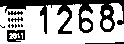

Processing: Cars153.png

0: 384x640 1 licence, 959.9ms
Speed: 4.0ms preprocess, 959.9ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)
[2025/03/18 00:19:16] ppocr DEBUG: dt_boxes num : 2, elapsed : 0.07654881477355957
[2025/03/18 00:19:16] ppocr DEBUG: cls num  : 2, elapsed : 0.013971567153930664
[2025/03/18 00:19:17] ppocr DEBUG: rec_res num  : 2, elapsed : 0.25848841667175293
Ground Truth: MH 20 BQ 20
PaddleOCR: MH 2O BQ 20
WER: 9.09%


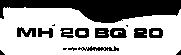

Processing: Cars48.png

0: 384x640 1 licence, 934.1ms
Speed: 4.2ms preprocess, 934.1ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)
[2025/03/18 00:19:18] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.06816792488098145
[2025/03/18 00:19:18] ppocr DEBUG: cls num  : 1, elapsed : 0.015141725540161133
[2025/03/18 00:19:18] ppocr DEBUG: rec_res num  : 1, elapsed : 0.07374882698059082
Ground Truth: ALR 486
PaddleOCR: ALR 486
WER: 0.00%


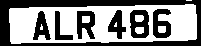

Processing: Cars182.png

0: 384x640 1 licence, 1293.6ms
Speed: 3.7ms preprocess, 1293.6ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)
[2025/03/18 00:19:19] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.024143457412719727
[2025/03/18 00:19:19] ppocr DEBUG: cls num  : 1, elapsed : 0.01569390296936035
[2025/03/18 00:19:19] ppocr DEBUG: rec_res num  : 1, elapsed : 0.10071158409118652
Ground Truth: VI2 LAF
PaddleOCR: V12LAF
WER: 28.57%


Processing: Cars248.png

0: 480x640 1 licence, 2240.0ms
Speed: 6.2ms preprocess, 2240.0ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)
[2025/03/18 00:19:22] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.01894688606262207
[2025/03/18 00:19:22] ppocr DEBUG: cls num  : 1, elapsed : 0.013162612915039062
[2025/03/18 00:19:22] ppocr DEBUG: rec_res num  : 1, elapsed : 0.10178279876708984
Ground Truth: MH12DE1433
PaddleOCR: HH12DE1433
WER: 10.00%


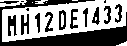

Processing: Cars189.png

0: 448x640 1 licence, 1285.9ms
Speed: 4.9ms preprocess, 1285.9ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)
[2025/03/18 00:19:23] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.019401073455810547
[2025/03/18 00:19:23] ppocr DEBUG: cls num  : 1, elapsed : 0.018655061721801758
[2025/03/18 00:19:23] ppocr DEBUG: rec_res num  : 1, elapsed : 0.0743095874786377
Ground Truth: CH01AN0001
PaddleOCR: CH01AN0001
WER: 0.00%


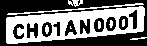

Processing: Cars0.png

0: 352x640 1 licence, 877.2ms
Speed: 4.4ms preprocess, 877.2ms inference, 1.0ms postprocess per image at shape (1, 3, 352, 640)
[2025/03/18 00:19:24] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.022473573684692383
[2025/03/18 00:19:24] ppocr DEBUG: cls num  : 1, elapsed : 0.01167607307434082
[2025/03/18 00:19:24] ppocr DEBUG: rec_res num  : 1, elapsed : 0.08101415634155273
Ground Truth: KLO1CA2555
PaddleOCR: KLG1CA2555
WER: 10.00%


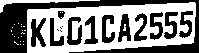

Processing: Cars10.png

0: 384x640 1 licence, 937.7ms
Speed: 4.1ms preprocess, 937.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)
[2025/03/18 00:19:25] ppocr DEBUG: dt_boxes num : 3, elapsed : 0.08817148208618164
[2025/03/18 00:19:25] ppocr DEBUG: cls num  : 3, elapsed : 0.0460813045501709
[2025/03/18 00:19:26] ppocr DEBUG: rec_res num  : 3, elapsed : 0.27722978591918945
Ground Truth: TN 37 C5 2765
PaddleOCR: TN 37 CS  765
WER: 15.38%


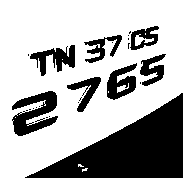

Processing: Cars181.png

0: 640x384 1 licence, 938.4ms
Speed: 3.9ms preprocess, 938.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)
[2025/03/18 00:19:27] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.03374528884887695
[2025/03/18 00:19:27] ppocr DEBUG: cls num  : 1, elapsed : 0.011861562728881836
[2025/03/18 00:19:27] ppocr DEBUG: rec_res num  : 1, elapsed : 0.07300233840942383
Ground Truth: JH11 HAD
PaddleOCR: HHII
WER: 75.00%


Processing: Cars51.png

0: 448x640 1 licence, 1128.3ms
Speed: 4.2ms preprocess, 1128.3ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)
[2025/03/18 00:19:28] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.01700425148010254
[2025/03/18 00:19:28] ppocr DEBUG: cls num  : 1, elapsed : 0.012698173522949219
[2025/03/18 00:19:28] ppocr DEBUG: rec_res num  : 1, elapsed : 0.07269096374511719
Ground Truth: YESS BOSS
PaddleOCR: 
WER: 100.00%


Processing: Cars3.png

0: 384x640 1 licence, 973.7ms
Speed: 4.3ms preprocess, 973.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)
[2025/03/18 00:19:29] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.021518468856811523
[2025/03/18 00:19:29] ppocr DEBUG: cls num  : 1, elapsed : 0.013181924819946289
[2025/03/18 00:19:29] ppocr DEBUG: rec_res num  : 1, elapsed : 0.07119917869567871
Ground Truth: DZI7 YXR
PaddleOCR: DZl7 YXR
WER: 12.50%


Processing: Cars27.png

0: 384x640 1 licence, 1000.6ms
Speed: 3.7ms preprocess, 1000.6ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)
[2025/03/18 00:19:30] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.02011871337890625
[2025/03/18 00:19:30] ppocr DEBUG: cls num  : 1, elapsed : 0.012740850448608398
[2025/03/18 00:19:30] ppocr DEBUG: rec_res num  : 1, elapsed : 0.06944131851196289
Ground Truth: DZI7 YXR
PaddleOCR: DZl7 YXR
WER: 12.50%


Processing: Cars12.png

0: 256x640 1 licence, 654.9ms
Speed: 2.5ms preprocess, 654.9ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)
[2025/03/18 00:19:31] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.017407655715942383
[2025/03/18 00:19:31] ppocr DEBUG: cls num  : 1, elapsed : 0.01209115982055664
[2025/03/18 00:19:31] ppocr DEBUG: rec_res num  : 1, elapsed : 0.07072806358337402
Ground Truth: MH12BG7237
PaddleOCR: MH129G7237
WER: 10.00%


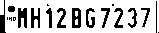

Processing: Cars161.png

0: 512x640 1 licence, 1307.3ms
Speed: 5.3ms preprocess, 1307.3ms inference, 1.2ms postprocess per image at shape (1, 3, 512, 640)
[2025/03/18 00:19:32] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.0247189998626709
[2025/03/18 00:19:32] ppocr DEBUG: cls num  : 1, elapsed : 0.021531105041503906
[2025/03/18 00:19:33] ppocr DEBUG: rec_res num  : 1, elapsed : 0.10948610305786133
Ground Truth: M666 YOB
PaddleOCR: M666Y06
WER: 37.50%


Processing: Cars11.png

0: 512x640 1 licence, 2103.9ms
Speed: 5.1ms preprocess, 2103.9ms inference, 1.9ms postprocess per image at shape (1, 3, 512, 640)
[2025/03/18 00:19:35] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.020644426345825195
[2025/03/18 00:19:35] ppocr DEBUG: cls num  : 1, elapsed : 0.022082805633544922
[2025/03/18 00:19:35] ppocr DEBUG: rec_res num  : 1, elapsed : 0.10566377639770508
Ground Truth: WOR 519K
PaddleOCR: WOR 5I6K
WER: 25.00%


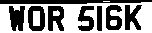

Processing: Cars190.png

0: 480x640 1 licence, 1553.1ms
Speed: 5.7ms preprocess, 1553.1ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)
[2025/03/18 00:19:36] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.019965410232543945
[2025/03/18 00:19:37] ppocr DEBUG: cls num  : 1, elapsed : 0.012001991271972656
[2025/03/18 00:19:37] ppocr DEBUG: rec_res num  : 1, elapsed : 0.07021117210388184
Ground Truth: KL 54 A 2670
PaddleOCR: KL54A-2670
WER: 25.00%


Processing: Cars251.png

0: 384x640 1 licence, 1016.3ms
Speed: 4.5ms preprocess, 1016.3ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)
[2025/03/18 00:19:38] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.01597285270690918
[2025/03/18 00:19:38] ppocr DEBUG: cls num  : 1, elapsed : 0.012752771377563477
[2025/03/18 00:19:38] ppocr DEBUG: rec_res num  : 1, elapsed : 0.07207989692687988
Ground Truth: H982FKL
PaddleOCR: H8.
WER: 71.43%


Processing: Cars126.png

0: 480x640 1 licence, 1237.6ms
Speed: 5.4ms preprocess, 1237.6ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)
[2025/03/18 00:19:39] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.08124995231628418
[2025/03/18 00:19:39] ppocr DEBUG: cls num  : 1, elapsed : 0.013327360153198242
[2025/03/18 00:19:39] ppocr DEBUG: rec_res num  : 1, elapsed : 0.07257246971130371
Ground Truth: KA 05MG1909
PaddleOCR: KA G5MG190
WER: 18.18%


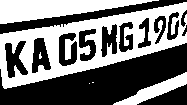

Processing: Cars14.png

0: 384x640 1 licence, 1003.6ms
Speed: 4.2ms preprocess, 1003.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)
[2025/03/18 00:19:40] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.018204450607299805
[2025/03/18 00:19:40] ppocr DEBUG: cls num  : 1, elapsed : 0.011754274368286133
[2025/03/18 00:19:40] ppocr DEBUG: rec_res num  : 1, elapsed : 0.06824159622192383
Ground Truth: ALR 486
PaddleOCR: ALR 486
WER: 0.00%


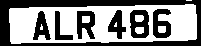

Processing: Cars219.png

0: 480x640 2 licences, 1229.9ms
Speed: 8.1ms preprocess, 1229.9ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)
[2025/03/18 00:19:42] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.09311580657958984
[2025/03/18 00:19:42] ppocr DEBUG: cls num  : 1, elapsed : 0.012500524520874023
[2025/03/18 00:19:42] ppocr DEBUG: rec_res num  : 1, elapsed : 0.11944770812988281
Ground Truth: KA 03 MG 2784
PaddleOCR: KA-03:MG : 27
WER: 46.15%


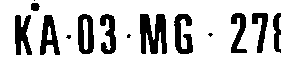

[2025/03/18 00:19:42] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.10083723068237305
[2025/03/18 00:19:42] ppocr DEBUG: cls num  : 1, elapsed : 0.012804746627807617
[2025/03/18 00:19:42] ppocr DEBUG: rec_res num  : 1, elapsed : 0.07352137565612793
Ground Truth: KA 03 MG 2784
PaddleOCR: 03:MG: 2784
WER: 38.46%


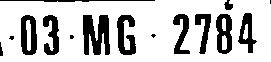

Processing: Cars59.png

0: 480x640 1 licence, 1225.3ms
Speed: 4.8ms preprocess, 1225.3ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)
[2025/03/18 00:19:43] ppocr DEBUG: dt_boxes num : 0, elapsed : 0.016798019409179688
[2025/03/18 00:19:43] ppocr DEBUG: cls num  : 0, elapsed : 0
[2025/03/18 00:19:43] ppocr DEBUG: rec_res num  : 0, elapsed : 2.1457672119140625e-06
Ground Truth: MH 46 P 1661
PaddleOCR: 
WER: 100.00%


Processing: Cars198.png

0: 512x640 1 licence, 1360.7ms
Speed: 5.6ms preprocess, 1360.7ms inference, 1.7ms postprocess per image at shape (1, 3, 512, 640)
[2025/03/18 00:19:45] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.019435644149780273
[2025/03/18 00:19:45] ppocr DEBUG: cls num  : 1, elapsed : 0.012167692184448242
[2025/03/18 00:19:45] ppocr DEBUG: rec_res num  : 1, elapsed : 0.06886982917785645
Ground Truth: MH01AV8866
PaddleOCR: MHO1AY8866
WER: 20.00%


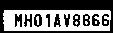

Processing: Cars34.png

0: 544x640 1 licence, 2266.0ms
Speed: 5.5ms preprocess, 2266.0ms inference, 1.9ms postprocess per image at shape (1, 3, 544, 640)
[2025/03/18 00:19:47] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.0315861701965332
[2025/03/18 00:19:47] ppocr DEBUG: cls num  : 1, elapsed : 0.02114248275756836
[2025/03/18 00:19:47] ppocr DEBUG: rec_res num  : 1, elapsed : 0.10874819755554199
Ground Truth: DL7C N 5617
PaddleOCR: DL7C N 5617
WER: 0.00%


Processing: Cars97.png

0: 480x640 1 licence, 1916.4ms
Speed: 4.8ms preprocess, 1916.4ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)
[2025/03/18 00:19:49] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.049179792404174805
[2025/03/18 00:19:49] ppocr DEBUG: cls num  : 1, elapsed : 0.014380693435668945
[2025/03/18 00:19:49] ppocr DEBUG: rec_res num  : 1, elapsed : 0.07721257209777832
Ground Truth: KA 05MG 1909
PaddleOCR: KA G5MG190
WER: 25.00%


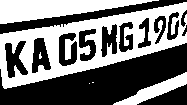

Processing: Cars116.png

0: 544x640 1 licence, 1425.9ms
Speed: 5.7ms preprocess, 1425.9ms inference, 1.3ms postprocess per image at shape (1, 3, 544, 640)
[2025/03/18 00:19:51] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.01638340950012207
[2025/03/18 00:19:51] ppocr DEBUG: cls num  : 1, elapsed : 0.010944128036499023
[2025/03/18 00:19:51] ppocr DEBUG: rec_res num  : 1, elapsed : 0.07797408103942871
Ground Truth: MK 35 32
PaddleOCR: MK-35-32
WER: 25.00%


Processing: Cars246.png

0: 448x640 1 licence, 1153.2ms
Speed: 4.8ms preprocess, 1153.2ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)
[2025/03/18 00:19:52] ppocr DEBUG: dt_boxes num : 0, elapsed : 0.016575098037719727
[2025/03/18 00:19:52] ppocr DEBUG: cls num  : 0, elapsed : 0
[2025/03/18 00:19:52] ppocr DEBUG: rec_res num  : 0, elapsed : 2.86102294921875e-06
Ground Truth: TS009 TC 268
PaddleOCR: 
WER: 100.00%


Processing: Cars8.png

0: 320x640 1 licence, 813.6ms
Speed: 3.7ms preprocess, 813.6ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 640)
[2025/03/18 00:19:53] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.04649186134338379
[2025/03/18 00:19:53] ppocr DEBUG: cls num  : 1, elapsed : 0.014053106307983398
[2025/03/18 00:19:53] ppocr DEBUG: rec_res num  : 1, elapsed : 0.07495427131652832
Ground Truth: G526 JHD
PaddleOCR: G526 JHD
WER: 0.00%


Processing: Cars259.png

0: 384x640 1 licence, 972.5ms
Speed: 4.7ms preprocess, 972.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)
[2025/03/18 00:19:54] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.019605398178100586
[2025/03/18 00:19:54] ppocr DEBUG: cls num  : 1, elapsed : 0.013054370880126953
[2025/03/18 00:19:54] ppocr DEBUG: rec_res num  : 1, elapsed : 0.07021832466125488
Ground Truth: MH 20 EE 7598
PaddleOCR: MH 20 EE 7598
WER: 0.00%


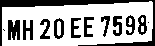

Processing: Cars52.png

0: 480x640 1 licence, 1243.8ms
Speed: 5.2ms preprocess, 1243.8ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
[2025/03/18 00:19:56] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.018301963806152344
[2025/03/18 00:19:56] ppocr DEBUG: cls num  : 1, elapsed : 0.012374162673950195
[2025/03/18 00:19:56] ppocr DEBUG: rec_res num  : 1, elapsed : 0.07587885856628418
Ground Truth: MH15BD8877
PaddleOCR: MH15808877
WER: 20.00%


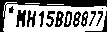

Processing: Cars102.png

0: 512x640 4 licences, 1297.2ms
Speed: 4.8ms preprocess, 1297.2ms inference, 2.8ms postprocess per image at shape (1, 3, 512, 640)
[2025/03/18 00:19:57] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.07608723640441895
[2025/03/18 00:19:57] ppocr DEBUG: cls num  : 1, elapsed : 0.01284933090209961
[2025/03/18 00:19:57] ppocr DEBUG: rec_res num  : 1, elapsed : 0.07041501998901367
Ground Truth: 68 611 36
PaddleOCR: 68:611
WER: 44.44%


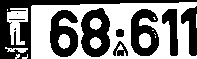

[2025/03/18 00:19:57] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.020136356353759766
[2025/03/18 00:19:57] ppocr DEBUG: cls num  : 1, elapsed : 0.014490604400634766
[2025/03/18 00:19:57] ppocr DEBUG: rec_res num  : 1, elapsed : 0.06832265853881836
Ground Truth: 68 611 36
PaddleOCR: 68:611-3
WER: 33.33%


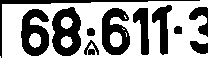

[2025/03/18 00:19:57] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.022751569747924805
[2025/03/18 00:19:57] ppocr DEBUG: cls num  : 1, elapsed : 0.013031244277954102
[2025/03/18 00:19:57] ppocr DEBUG: rec_res num  : 1, elapsed : 0.0749046802520752
Ground Truth: 68 611 36
PaddleOCR: :61136
WER: 44.44%


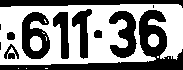

[2025/03/18 00:19:58] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.03305482864379883
[2025/03/18 00:19:58] ppocr DEBUG: cls num  : 1, elapsed : 0.013844490051269531
[2025/03/18 00:19:58] ppocr DEBUG: rec_res num  : 1, elapsed : 0.0843358039855957
Ground Truth: 68 611 36
PaddleOCR: 68:611-36
WER: 22.22%


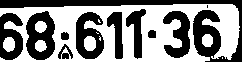

Processing: Cars244.png

0: 480x640 2 licences, 1247.5ms
Speed: 5.3ms preprocess, 1247.5ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)
[2025/03/18 00:19:59] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.08214259147644043
[2025/03/18 00:19:59] ppocr DEBUG: cls num  : 1, elapsed : 0.013806343078613281
[2025/03/18 00:19:59] ppocr DEBUG: rec_res num  : 1, elapsed : 0.07525300979614258
Ground Truth: 21 801 27
PaddleOCR: 21:801
WER: 44.44%


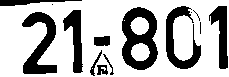

[2025/03/18 00:19:59] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.038912296295166016
[2025/03/18 00:19:59] ppocr DEBUG: cls num  : 1, elapsed : 0.01155400276184082
[2025/03/18 00:19:59] ppocr DEBUG: rec_res num  : 1, elapsed : 0.07308673858642578
Ground Truth: 21 801 27
PaddleOCR: 1:801-27
WER: 33.33%


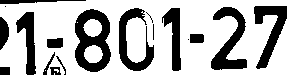

Processing: Cars1.png

0: 416x640 1 licence, 1640.0ms
Speed: 4.5ms preprocess, 1640.0ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 640)
[2025/03/18 00:20:01] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.025579452514648438
[2025/03/18 00:20:01] ppocr DEBUG: cls num  : 1, elapsed : 0.01990962028503418
[2025/03/18 00:20:01] ppocr DEBUG: rec_res num  : 1, elapsed : 0.09991025924682617
Ground Truth: PG MN112
PaddleOCR: PGMN112
WER: 12.50%


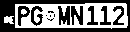

Processing: Cars235.png

0: 384x640 1 licence, 1499.4ms
Speed: 5.8ms preprocess, 1499.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)
[2025/03/18 00:20:03] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.034285545349121094
[2025/03/18 00:20:03] ppocr DEBUG: cls num  : 1, elapsed : 0.019392967224121094
[2025/03/18 00:20:03] ppocr DEBUG: rec_res num  : 1, elapsed : 0.09244441986083984
Ground Truth: IM4U 555
PaddleOCR: GJ03JL0126
WER: 125.00%


Processing: Cars186.png

0: 384x640 1 licence, 980.7ms
Speed: 4.3ms preprocess, 980.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)
[2025/03/18 00:20:04] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.022067785263061523
[2025/03/18 00:20:04] ppocr DEBUG: cls num  : 1, elapsed : 0.013780355453491211
[2025/03/18 00:20:04] ppocr DEBUG: rec_res num  : 1, elapsed : 0.08605098724365234
Ground Truth: 26 SPF 4
PaddleOCR: 26-SPF-4
WER: 25.00%


Processing: Cars50.png

0: 384x640 2 licences, 1003.4ms
Speed: 4.4ms preprocess, 1003.4ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)
[2025/03/18 00:20:05] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.1270303726196289
[2025/03/18 00:20:05] ppocr DEBUG: cls num  : 1, elapsed : 0.014215707778930664
[2025/03/18 00:20:05] ppocr DEBUG: rec_res num  : 1, elapsed : 0.07381987571716309
Ground Truth: PUI8 BES
PaddleOCR: PUI8 BES
WER: 0.00%


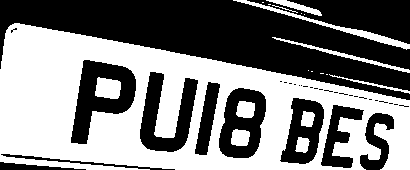

[2025/03/18 00:20:05] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.11417031288146973
[2025/03/18 00:20:05] ppocr DEBUG: cls num  : 1, elapsed : 0.014848709106445312
[2025/03/18 00:20:05] ppocr DEBUG: rec_res num  : 1, elapsed : 0.07458281517028809
Ground Truth: PUI8 BES
PaddleOCR: PUI8 BES
WER: 0.00%


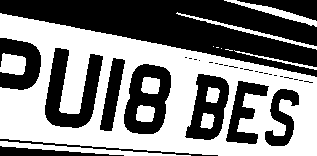

Processing: Cars177.png

0: 384x640 1 licence, 975.8ms
Speed: 4.7ms preprocess, 975.8ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)
[2025/03/18 00:20:06] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.02030634880065918
[2025/03/18 00:20:07] ppocr DEBUG: cls num  : 1, elapsed : 0.017747163772583008
[2025/03/18 00:20:07] ppocr DEBUG: rec_res num  : 1, elapsed : 0.07370829582214355
Ground Truth: GOOD
PaddleOCR: GOOD
WER: 0.00%


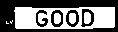

Processing: Cars175.png

0: 480x640 1 licence, 1261.1ms
Speed: 5.6ms preprocess, 1261.1ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)
[2025/03/18 00:20:08] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.0816047191619873
[2025/03/18 00:20:08] ppocr DEBUG: cls num  : 1, elapsed : 0.014785528182983398
[2025/03/18 00:20:08] ppocr DEBUG: rec_res num  : 1, elapsed : 0.08425259590148926
Ground Truth: DL 1N 4268
PaddleOCR: DL : 1N 42 68
WER: 30.00%


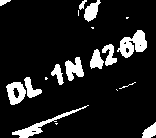

Processing: Cars165.png

0: 384x640 1 licence, 1005.8ms
Speed: 4.3ms preprocess, 1005.8ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)
[2025/03/18 00:20:09] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.019471406936645508
[2025/03/18 00:20:09] ppocr DEBUG: cls num  : 1, elapsed : 0.016591548919677734
[2025/03/18 00:20:09] ppocr DEBUG: rec_res num  : 1, elapsed : 0.06870508193969727
Ground Truth: TN21 AU 1153
PaddleOCR: TH2AU1153
WER: 33.33%


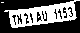

Processing: Cars96.png

0: 416x640 1 licence, 1061.3ms
Speed: 4.7ms preprocess, 1061.3ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 640)
[2025/03/18 00:20:10] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.020372629165649414
[2025/03/18 00:20:10] ppocr DEBUG: cls num  : 1, elapsed : 0.013933181762695312
[2025/03/18 00:20:10] ppocr DEBUG: rec_res num  : 1, elapsed : 0.07164835929870605
Ground Truth: PG MN112
PaddleOCR: PGMN112
WER: 12.50%


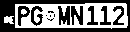

Processing: Cars7.png

0: 448x640 1 licence, 1138.4ms
Speed: 5.0ms preprocess, 1138.4ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)
[2025/03/18 00:20:12] ppocr DEBUG: dt_boxes num : 0, elapsed : 0.05980086326599121
[2025/03/18 00:20:12] ppocr DEBUG: cls num  : 0, elapsed : 0
[2025/03/18 00:20:12] ppocr DEBUG: rec_res num  : 0, elapsed : 2.1457672119140625e-06
Ground Truth: YSX 213
PaddleOCR: 
WER: 100.00%


Processing: Cars191.png

0: 416x640 1 licence, 1047.6ms
Speed: 4.9ms preprocess, 1047.6ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 640)
[2025/03/18 00:20:13] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.034589529037475586
[2025/03/18 00:20:13] ppocr DEBUG: cls num  : 1, elapsed : 0.022056102752685547
[2025/03/18 00:20:13] ppocr DEBUG: rec_res num  : 1, elapsed : 0.11581540107727051
Ground Truth: KA 03 AB 3380
PaddleOCR: A03AB 3380
WER: 23.08%


Processing: Cars21.png

0: 512x640 1 licence, 2070.6ms
Speed: 5.2ms preprocess, 2070.6ms inference, 1.5ms postprocess per image at shape (1, 3, 512, 640)
[2025/03/18 00:20:15] ppocr DEBUG: dt_boxes num : 0, elapsed : 0.03552556037902832
[2025/03/18 00:20:15] ppocr DEBUG: cls num  : 0, elapsed : 0
[2025/03/18 00:20:15] ppocr DEBUG: rec_res num  : 0, elapsed : 2.6226043701171875e-06
Ground Truth: IRQ
PaddleOCR: 
WER: 100.00%


Processing: Cars74.png

0: 448x640 1 licence, 1526.9ms
Speed: 4.6ms preprocess, 1526.9ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)
[2025/03/18 00:20:17] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.021669626235961914
[2025/03/18 00:20:17] ppocr DEBUG: cls num  : 1, elapsed : 0.014459609985351562
[2025/03/18 00:20:17] ppocr DEBUG: rec_res num  : 1, elapsed : 0.07727909088134766
Ground Truth: CZI7 KOD
PaddleOCR: CZI7 KOD
WER: 0.00%


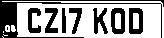

Processing: Cars183.png

0: 384x640 1 licence, 989.6ms
Speed: 4.6ms preprocess, 989.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)
[2025/03/18 00:20:18] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.019307613372802734
[2025/03/18 00:20:18] ppocr DEBUG: cls num  : 1, elapsed : 0.014182567596435547
[2025/03/18 00:20:18] ppocr DEBUG: rec_res num  : 1, elapsed : 0.07590961456298828
Ground Truth: BRIT 0001
PaddleOCR: BRIT 0001
WER: 0.00%


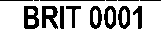

Processing: Cars130.png

0: 448x640 1 licence, 1145.2ms
Speed: 5.0ms preprocess, 1145.2ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)
[2025/03/18 00:20:19] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.01967787742614746
[2025/03/18 00:20:19] ppocr DEBUG: cls num  : 1, elapsed : 0.014399528503417969
[2025/03/18 00:20:19] ppocr DEBUG: rec_res num  : 1, elapsed : 0.07317662239074707
Ground Truth: HR 26 BR 9044
PaddleOCR: R268R9044
WER: 38.46%


Processing: Cars9.png

0: 512x640 1 licence, 1978.6ms
Speed: 5.2ms preprocess, 1978.6ms inference, 1.1ms postprocess per image at shape (1, 3, 512, 640)
[2025/03/18 00:20:21] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.024016141891479492
[2025/03/18 00:20:21] ppocr DEBUG: cls num  : 1, elapsed : 0.010737419128417969
[2025/03/18 00:20:21] ppocr DEBUG: rec_res num  : 1, elapsed : 0.08984684944152832
Ground Truth: MH01AV8866
PaddleOCR: MHO1AY8866
WER: 20.00%


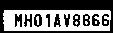

Processing: Cars15.png

0: 448x640 1 licence, 1163.1ms
Speed: 4.9ms preprocess, 1163.1ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)
[2025/03/18 00:20:23] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.02161264419555664
[2025/03/18 00:20:23] ppocr DEBUG: cls num  : 1, elapsed : 0.01620197296142578
[2025/03/18 00:20:23] ppocr DEBUG: rec_res num  : 1, elapsed : 0.0789632797241211
Ground Truth: TN21BY0166
PaddleOCR: 
WER: 100.00%


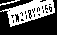

Processing: Cars233.png

0: 256x640 1 licence, 660.3ms
Speed: 3.2ms preprocess, 660.3ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)
[2025/03/18 00:20:23] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.020441293716430664
[2025/03/18 00:20:23] ppocr DEBUG: cls num  : 1, elapsed : 0.013711929321289062
[2025/03/18 00:20:24] ppocr DEBUG: rec_res num  : 1, elapsed : 0.07474946975708008
Ground Truth: UP16TCI366
PaddleOCR: 
WER: 100.00%


Processing: Cars57.png

0: 384x640 1 licence, 984.4ms
Speed: 5.0ms preprocess, 984.4ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)
[2025/03/18 00:20:25] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.019250869750976562
[2025/03/18 00:20:25] ppocr DEBUG: cls num  : 1, elapsed : 0.01538538932800293
[2025/03/18 00:20:25] ppocr DEBUG: rec_res num  : 1, elapsed : 0.08158731460571289
Ground Truth: BKWL 324
PaddleOCR: BKWL -324
WER: 12.50%


Processing: Cars255.png

0: 448x640 1 licence, 1140.2ms
Speed: 4.4ms preprocess, 1140.2ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)
[2025/03/18 00:20:26] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.02243804931640625
[2025/03/18 00:20:26] ppocr DEBUG: cls num  : 1, elapsed : 0.014923810958862305
[2025/03/18 00:20:26] ppocr DEBUG: rec_res num  : 1, elapsed : 0.08283138275146484
Ground Truth: MH 20 EJ0364
PaddleOCR: MH 20 EJ0364
WER: 0.00%


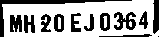

Processing: Cars82.png

0: 256x640 1 licence, 886.3ms
Speed: 3.1ms preprocess, 886.3ms inference, 1.4ms postprocess per image at shape (1, 3, 256, 640)
[2025/03/18 00:20:27] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.02837395668029785
[2025/03/18 00:20:27] ppocr DEBUG: cls num  : 1, elapsed : 0.01571488380432129
[2025/03/18 00:20:27] ppocr DEBUG: rec_res num  : 1, elapsed : 0.11168956756591797
Ground Truth: UP 16TC166
PaddleOCR: 
WER: 100.00%


Processing: Cars36.png

0: 480x640 1 licence, 1915.5ms
Speed: 5.1ms preprocess, 1915.5ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)
[2025/03/18 00:20:29] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.028987884521484375
[2025/03/18 00:20:29] ppocr DEBUG: cls num  : 1, elapsed : 0.025028467178344727
[2025/03/18 00:20:29] ppocr DEBUG: rec_res num  : 1, elapsed : 0.11391806602478027
Ground Truth: MIDLYPH
PaddleOCR: MIDLYPH
WER: 0.00%


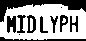

Processing: Cars60.png

0: 480x640 4 licences, 1378.1ms
Speed: 8.1ms preprocess, 1378.1ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)
[2025/03/18 00:20:31] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.033208608627319336
[2025/03/18 00:20:31] ppocr DEBUG: cls num  : 1, elapsed : 0.015324115753173828
[2025/03/18 00:20:31] ppocr DEBUG: rec_res num  : 1, elapsed : 0.07078194618225098
Ground Truth: OS 802 HN
PaddleOCR: US:8UZ
WER: 77.78%


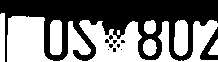

[2025/03/18 00:20:31] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.03450798988342285
[2025/03/18 00:20:31] ppocr DEBUG: cls num  : 1, elapsed : 0.012649059295654297
[2025/03/18 00:20:31] ppocr DEBUG: rec_res num  : 1, elapsed : 0.07215332984924316
Ground Truth: OS 802 HN
PaddleOCR: 802-HN
WER: 44.44%


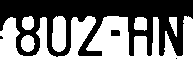

[2025/03/18 00:20:31] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.037988901138305664
[2025/03/18 00:20:31] ppocr DEBUG: cls num  : 1, elapsed : 0.01543426513671875
[2025/03/18 00:20:31] ppocr DEBUG: rec_res num  : 1, elapsed : 0.09066295623779297
Ground Truth: OS 802 HN
PaddleOCR: US:802-H
WER: 44.44%


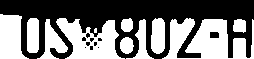

[2025/03/18 00:20:31] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.0277402400970459
[2025/03/18 00:20:31] ppocr DEBUG: cls num  : 1, elapsed : 0.015865564346313477
[2025/03/18 00:20:31] ppocr DEBUG: rec_res num  : 1, elapsed : 0.13776803016662598
Ground Truth: OS 802 HN
PaddleOCR: S802-HN7
WER: 44.44%


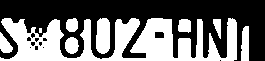

Processing: Cars94.png

0: 512x640 1 licence, 1328.8ms
Speed: 6.0ms preprocess, 1328.8ms inference, 1.3ms postprocess per image at shape (1, 3, 512, 640)
[2025/03/18 00:20:33] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.019973278045654297
[2025/03/18 00:20:33] ppocr DEBUG: cls num  : 1, elapsed : 0.0150909423828125
[2025/03/18 00:20:33] ppocr DEBUG: rec_res num  : 1, elapsed : 0.07259559631347656
Ground Truth: NBEYOND
PaddleOCR: NBEYOND
WER: 0.00%


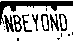

Processing: Cars145.png

0: 448x640 1 licence, 1161.0ms
Speed: 5.1ms preprocess, 1161.0ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)
[2025/03/18 00:20:34] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.020633935928344727
[2025/03/18 00:20:34] ppocr DEBUG: cls num  : 1, elapsed : 0.014601707458496094
[2025/03/18 00:20:34] ppocr DEBUG: rec_res num  : 1, elapsed : 0.07354927062988281
Ground Truth: CH01AN0001
PaddleOCR: CH01AN0001
WER: 0.00%


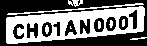

Processing: Cars125.png

0: 416x640 1 licence, 1057.3ms
Speed: 4.5ms preprocess, 1057.3ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 640)
[2025/03/18 00:20:35] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.07042407989501953
[2025/03/18 00:20:35] ppocr DEBUG: cls num  : 1, elapsed : 0.01565241813659668
[2025/03/18 00:20:35] ppocr DEBUG: rec_res num  : 1, elapsed : 0.07222485542297363
Ground Truth: RP 66887
PaddleOCR: 66887
WER: 37.50%


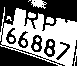

Processing: Cars32.png

0: 480x640 1 licence, 1244.6ms
Speed: 6.3ms preprocess, 1244.6ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)
[2025/03/18 00:20:37] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.018604516983032227
[2025/03/18 00:20:37] ppocr DEBUG: cls num  : 1, elapsed : 0.0146636962890625
[2025/03/18 00:20:37] ppocr DEBUG: rec_res num  : 1, elapsed : 0.07744765281677246
Ground Truth: MANISA
PaddleOCR: MANISA
WER: 0.00%


Processing: Cars252.png

0: 512x640 1 licence, 1357.4ms
Speed: 5.9ms preprocess, 1357.4ms inference, 1.4ms postprocess per image at shape (1, 3, 512, 640)
[2025/03/18 00:20:38] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.020481586456298828
[2025/03/18 00:20:38] ppocr DEBUG: cls num  : 1, elapsed : 0.013936042785644531
[2025/03/18 00:20:38] ppocr DEBUG: rec_res num  : 1, elapsed : 0.07860684394836426
Ground Truth: DAN 54P
PaddleOCR: DAN 54P
WER: 0.00%


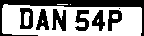

Processing: Cars123.png

0: 480x640 1 licence, 1248.0ms
Speed: 6.3ms preprocess, 1248.0ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)
[2025/03/18 00:20:40] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.017885208129882812
[2025/03/18 00:20:40] ppocr DEBUG: cls num  : 1, elapsed : 0.014904022216796875
[2025/03/18 00:20:40] ppocr DEBUG: rec_res num  : 1, elapsed : 0.07225990295410156
Ground Truth: HR 36 BC 5514
PaddleOCR: HR 26 8C 5SI4
WER: 30.77%


Processing: Cars192.png

0: 480x640 1 licence, 1959.6ms
Speed: 6.0ms preprocess, 1959.6ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)
[2025/03/18 00:20:42] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.032688140869140625
[2025/03/18 00:20:42] ppocr DEBUG: cls num  : 1, elapsed : 0.014629364013671875
[2025/03/18 00:20:42] ppocr DEBUG: rec_res num  : 1, elapsed : 0.10188531875610352
Ground Truth: E4 GLE
PaddleOCR: E4 GLE
WER: 0.00%


Processing: Cars45.png

0: 416x640 1 licence, 1455.9ms
Speed: 5.8ms preprocess, 1455.9ms inference, 0.9ms postprocess per image at shape (1, 3, 416, 640)
[2025/03/18 00:20:43] ppocr DEBUG: dt_boxes num : 0, elapsed : 0.027792930603027344
[2025/03/18 00:20:43] ppocr DEBUG: cls num  : 0, elapsed : 0
[2025/03/18 00:20:43] ppocr DEBUG: rec_res num  : 0, elapsed : 1.9073486328125e-06
Ground Truth: IMGROOT
PaddleOCR: 
WER: 100.00%


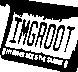

Processing: Cars193.png

0: 448x640 1 licence, 1152.6ms
Speed: 5.0ms preprocess, 1152.6ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)
[2025/03/18 00:20:45] ppocr DEBUG: dt_boxes num : 0, elapsed : 0.016934633255004883
[2025/03/18 00:20:45] ppocr DEBUG: cls num  : 0, elapsed : 0
[2025/03/18 00:20:45] ppocr DEBUG: rec_res num  : 0, elapsed : 1.9073486328125e-06
Ground Truth: 889 VSM
PaddleOCR: 
WER: 100.00%


Processing: Cars225.png

0: 416x640 1 licence, 1073.2ms
Speed: 5.5ms preprocess, 1073.2ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 640)
[2025/03/18 00:20:46] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.03691220283508301
[2025/03/18 00:20:46] ppocr DEBUG: cls num  : 1, elapsed : 0.015320539474487305
[2025/03/18 00:20:46] ppocr DEBUG: rec_res num  : 1, elapsed : 0.07358288764953613
Ground Truth: JA62 UAR
PaddleOCR: JA62 UAR
WER: 0.00%


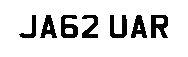

Processing: Cars118.png

0: 416x640 1 licence, 1046.4ms
Speed: 5.2ms preprocess, 1046.4ms inference, 1.1ms postprocess per image at shape (1, 3, 416, 640)
[2025/03/18 00:20:47] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.025360584259033203
[2025/03/18 00:20:47] ppocr DEBUG: cls num  : 1, elapsed : 0.015326738357543945
[2025/03/18 00:20:47] ppocr DEBUG: rec_res num  : 1, elapsed : 0.07308101654052734
Ground Truth: JA62 UAR
PaddleOCR: JA62 UAR
WER: 0.00%


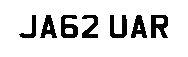

Processing: Cars230.png

0: 384x640 1 licence, 996.0ms
Speed: 4.6ms preprocess, 996.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)
[2025/03/18 00:20:48] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.019629240036010742
[2025/03/18 00:20:48] ppocr DEBUG: cls num  : 1, elapsed : 0.013625144958496094
[2025/03/18 00:20:48] ppocr DEBUG: rec_res num  : 1, elapsed : 0.07896089553833008
Ground Truth: LR33 TEE
PaddleOCR: L.R33 TEE
WER: 12.50%


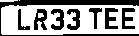

Processing: Cars73.png

0: 384x640 1 licence, 972.8ms
Speed: 4.3ms preprocess, 972.8ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)
[2025/03/18 00:20:49] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.021028518676757812
[2025/03/18 00:20:49] ppocr DEBUG: cls num  : 1, elapsed : 0.014183521270751953
[2025/03/18 00:20:49] ppocr DEBUG: rec_res num  : 1, elapsed : 0.0763540267944336
Ground Truth: TN 99 F 2378
PaddleOCR: tN 99 F 2378
WER: 8.33%


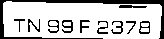

Processing: Cars4.png

0: 384x640 2 licences, 993.9ms
Speed: 4.6ms preprocess, 993.9ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)
[2025/03/18 00:20:50] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.13124418258666992
[2025/03/18 00:20:51] ppocr DEBUG: cls num  : 1, elapsed : 0.015651464462280273
[2025/03/18 00:20:51] ppocr DEBUG: rec_res num  : 1, elapsed : 0.0708458423614502
Ground Truth: PUI8 BES
PaddleOCR: PUI8 BES
WER: 0.00%


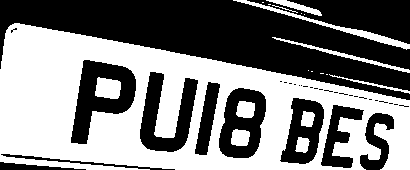

[2025/03/18 00:20:51] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.12052178382873535
[2025/03/18 00:20:51] ppocr DEBUG: cls num  : 1, elapsed : 0.016259431838989258
[2025/03/18 00:20:51] ppocr DEBUG: rec_res num  : 1, elapsed : 0.0772712230682373
Ground Truth: PUI8 BES
PaddleOCR: PUI8 BES
WER: 0.00%


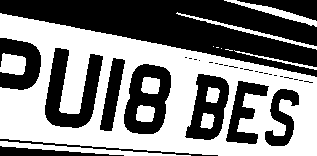

Processing: Cars156.png

0: 320x640 1 licence, 814.5ms
Speed: 3.5ms preprocess, 814.5ms inference, 1.3ms postprocess per image at shape (1, 3, 320, 640)
[2025/03/18 00:20:52] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.02255725860595703
[2025/03/18 00:20:52] ppocr DEBUG: cls num  : 1, elapsed : 0.014576911926269531
[2025/03/18 00:20:52] ppocr DEBUG: rec_res num  : 1, elapsed : 0.07344532012939453
Ground Truth: PRIV ATE
PaddleOCR: PRIV ATE
WER: 0.00%


Processing: Cars234.png

0: 384x640 1 licence, 978.0ms
Speed: 4.2ms preprocess, 978.0ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)
[2025/03/18 00:20:53] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.02910470962524414
[2025/03/18 00:20:53] ppocr DEBUG: cls num  : 1, elapsed : 0.01532602310180664
[2025/03/18 00:20:53] ppocr DEBUG: rec_res num  : 1, elapsed : 0.08689069747924805
Ground Truth: GJ03JL0126
PaddleOCR: Im4U 555
WER: 100.00%


Processing: Cars247.png

0: 384x640 1 licence, 1503.3ms
Speed: 4.4ms preprocess, 1503.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)
[2025/03/18 00:20:55] ppocr DEBUG: dt_boxes num : 3, elapsed : 0.14081859588623047
[2025/03/18 00:20:55] ppocr DEBUG: cls num  : 3, elapsed : 0.07510900497436523
[2025/03/18 00:20:55] ppocr DEBUG: rec_res num  : 3, elapsed : 0.34511232376098633
Ground Truth: TN 37 C5 2765
PaddleOCR: TN 37 CS  765
WER: 15.38%


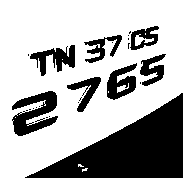

Processing: Cars72.png

0: 544x640 1 licence, 1806.9ms
Speed: 5.4ms preprocess, 1806.9ms inference, 7.7ms postprocess per image at shape (1, 3, 544, 640)
[2025/03/18 00:20:57] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.019533157348632812
[2025/03/18 00:20:57] ppocr DEBUG: cls num  : 1, elapsed : 0.01410984992980957
[2025/03/18 00:20:57] ppocr DEBUG: rec_res num  : 1, elapsed : 0.07768082618713379
Ground Truth: DL7C N 5617
PaddleOCR: DL7C N 5617
WER: 0.00%


Processing: Cars147.png

0: 352x640 1 licence, 909.5ms
Speed: 4.1ms preprocess, 909.5ms inference, 1.0ms postprocess per image at shape (1, 3, 352, 640)
[2025/03/18 00:20:58] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.03234219551086426
[2025/03/18 00:20:58] ppocr DEBUG: cls num  : 1, elapsed : 0.01391148567199707
[2025/03/18 00:20:58] ppocr DEBUG: rec_res num  : 1, elapsed : 0.07201385498046875
Ground Truth: KLO1C12555
PaddleOCR: KLG1CA2555
WER: 20.00%


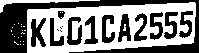

Processing: Cars152.png

0: 416x640 1 licence, 1036.5ms
Speed: 5.0ms preprocess, 1036.5ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 640)
[2025/03/18 00:20:59] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.02971172332763672
[2025/03/18 00:20:59] ppocr DEBUG: cls num  : 1, elapsed : 0.018706560134887695
[2025/03/18 00:20:59] ppocr DEBUG: rec_res num  : 1, elapsed : 0.09008908271789551
Ground Truth: DL49 AK49
PaddleOCR: DL49 AK49
WER: 0.00%


Processing: Cars257.png

0: 480x640 1 licence, 1227.6ms
Speed: 4.6ms preprocess, 1227.6ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)
[2025/03/18 00:21:01] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.019372940063476562
[2025/03/18 00:21:01] ppocr DEBUG: cls num  : 1, elapsed : 0.014151573181152344
[2025/03/18 00:21:01] ppocr DEBUG: rec_res num  : 1, elapsed : 0.08465456962585449
Ground Truth: OK LA
PaddleOCR: OK LA
WER: 0.00%


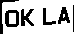

Processing: Cars86.png

0: 384x640 1 licence, 993.9ms
Speed: 4.3ms preprocess, 993.9ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)
[2025/03/18 00:21:02] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.01918196678161621
[2025/03/18 00:21:02] ppocr DEBUG: cls num  : 1, elapsed : 0.015398979187011719
[2025/03/18 00:21:02] ppocr DEBUG: rec_res num  : 1, elapsed : 0.07401704788208008
Ground Truth: MH14DX9937
PaddleOCR: H140X9937
WER: 20.00%


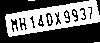

Processing: Cars31.png

0: 416x640 1 licence, 1039.0ms
Speed: 4.9ms preprocess, 1039.0ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 640)
[2025/03/18 00:21:03] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.02311229705810547
[2025/03/18 00:21:03] ppocr DEBUG: cls num  : 1, elapsed : 0.015943288803100586
[2025/03/18 00:21:03] ppocr DEBUG: rec_res num  : 1, elapsed : 0.07954692840576172
Ground Truth: YD63 LB
PaddleOCR: YD63 LB
WER: 0.00%


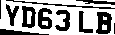

Processing: Cars222.png

0: 384x640 1 licence, 981.5ms
Speed: 3.9ms preprocess, 981.5ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)
[2025/03/18 00:21:04] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.018815040588378906
[2025/03/18 00:21:04] ppocr DEBUG: cls num  : 1, elapsed : 0.015308380126953125
[2025/03/18 00:21:04] ppocr DEBUG: rec_res num  : 1, elapsed : 0.07857322692871094
Ground Truth: 26 SPF 4
PaddleOCR: 26-SPF-4
WER: 25.00%


Processing: Cars85.png

0: 448x640 3 licences, 1134.7ms
Speed: 4.2ms preprocess, 1134.7ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)
[2025/03/18 00:21:05] ppocr DEBUG: dt_boxes num : 0, elapsed : 0.01804208755493164
[2025/03/18 00:21:05] ppocr DEBUG: cls num  : 0, elapsed : 0
[2025/03/18 00:21:05] ppocr DEBUG: rec_res num  : 0, elapsed : 1.9073486328125e-06
Ground Truth: VU63 GTY
PaddleOCR: 
WER: 100.00%


[2025/03/18 00:21:05] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.017858505249023438
[2025/03/18 00:21:05] ppocr DEBUG: cls num  : 1, elapsed : 0.018172502517700195
[2025/03/18 00:21:06] ppocr DEBUG: rec_res num  : 1, elapsed : 0.10927915573120117
Ground Truth: VU63 GTY
PaddleOCR: YU63GTY
WER: 25.00%


[2025/03/18 00:21:06] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.019471168518066406
[2025/03/18 00:21:06] ppocr DEBUG: cls num  : 1, elapsed : 0.015575885772705078
[2025/03/18 00:21:06] ppocr DEBUG: rec_res num  : 1, elapsed : 0.10386395454406738
Ground Truth: VU63 GTY
PaddleOCR: YU63 GTY
WER: 12.50%


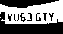

Processing: Cars58.png

0: 416x640 1 licence, 1270.7ms
Speed: 4.7ms preprocess, 1270.7ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 640)
[2025/03/18 00:21:07] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.024213075637817383
[2025/03/18 00:21:07] ppocr DEBUG: cls num  : 1, elapsed : 0.015730619430541992
[2025/03/18 00:21:07] ppocr DEBUG: rec_res num  : 1, elapsed : 0.10345077514648438
Ground Truth: MH 01 DB 0001
PaddleOCR: H01DB000
WER: 38.46%


Processing: Cars187.png

0: 384x640 1 licence, 1562.8ms
Speed: 4.2ms preprocess, 1562.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)
[2025/03/18 00:21:09] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.08631205558776855
[2025/03/18 00:21:09] ppocr DEBUG: cls num  : 1, elapsed : 0.02072429656982422
[2025/03/18 00:21:09] ppocr DEBUG: rec_res num  : 1, elapsed : 0.1116642951965332
Ground Truth: ALR 486
PaddleOCR: ALR 486
WER: 0.00%


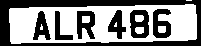

Processing: Cars239.png

0: 512x640 1 licence, 1597.9ms
Speed: 6.0ms preprocess, 1597.9ms inference, 1.3ms postprocess per image at shape (1, 3, 512, 640)
[2025/03/18 00:21:11] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.019634246826171875
[2025/03/18 00:21:11] ppocr DEBUG: cls num  : 1, elapsed : 0.01369023323059082
[2025/03/18 00:21:11] ppocr DEBUG: rec_res num  : 1, elapsed : 0.08168196678161621
Ground Truth: 15 LK 10898
PaddleOCR: 15-LK-10898
WER: 18.18%


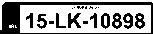

Processing: Cars104.png

0: 480x640 1 licence, 1259.2ms
Speed: 5.5ms preprocess, 1259.2ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
[2025/03/18 00:21:12] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.017790794372558594
[2025/03/18 00:21:12] ppocr DEBUG: cls num  : 1, elapsed : 0.01424098014831543
[2025/03/18 00:21:12] ppocr DEBUG: rec_res num  : 1, elapsed : 0.1454768180847168
Ground Truth: NL60 LXB
PaddleOCR: 
WER: 100.00%


Processing: Cars44.png

0: 480x640 3 licences, 1239.2ms
Speed: 5.3ms preprocess, 1239.2ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
[2025/03/18 00:21:14] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.09517717361450195
[2025/03/18 00:21:14] ppocr DEBUG: cls num  : 1, elapsed : 0.014231443405151367
[2025/03/18 00:21:14] ppocr DEBUG: rec_res num  : 1, elapsed : 0.0743100643157959
Ground Truth: DL36BF3907 DL26AG0786
PaddleOCR: DL2C AG C
WER: 76.19%


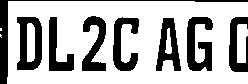

[2025/03/18 00:21:14] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.09630513191223145
[2025/03/18 00:21:14] ppocr DEBUG: cls num  : 1, elapsed : 0.014702796936035156
[2025/03/18 00:21:14] ppocr DEBUG: rec_res num  : 1, elapsed : 0.07319450378417969
Ground Truth: DL36BF3907 DL26AG0786
PaddleOCR: C AG 0786
WER: 71.43%


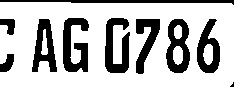

[2025/03/18 00:21:14] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.11878108978271484
[2025/03/18 00:21:14] ppocr DEBUG: cls num  : 1, elapsed : 0.015416145324707031
[2025/03/18 00:21:14] ppocr DEBUG: rec_res num  : 1, elapsed : 0.07273173332214355
Ground Truth: DL36BF3907 DL26AG0786
PaddleOCR: DL2C AG O78
WER: 71.43%


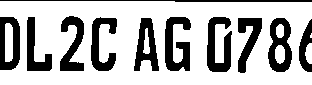

Processing: Cars84.png

0: 480x640 1 licence, 1219.8ms
Speed: 5.1ms preprocess, 1219.8ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)
[2025/03/18 00:21:15] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.022675275802612305
[2025/03/18 00:21:15] ppocr DEBUG: cls num  : 1, elapsed : 0.014177083969116211
[2025/03/18 00:21:16] ppocr DEBUG: rec_res num  : 1, elapsed : 0.08105969429016113
Ground Truth: HR 26 BC 5514
PaddleOCR: Hi55 369
WER: 84.62%


Processing: Cars69.png

0: 448x640 1 licence, 1134.7ms
Speed: 6.8ms preprocess, 1134.7ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)
[2025/03/18 00:21:17] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.023372888565063477
[2025/03/18 00:21:17] ppocr DEBUG: cls num  : 1, elapsed : 0.013935565948486328
[2025/03/18 00:21:17] ppocr DEBUG: rec_res num  : 1, elapsed : 0.07389187812805176
Ground Truth: KWID
PaddleOCR: KD
WER: 50.00%


Processing: Cars120.png

0: 448x640 1 licence, 1137.6ms
Speed: 4.9ms preprocess, 1137.6ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)
[2025/03/18 00:21:18] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.03187251091003418
[2025/03/18 00:21:18] ppocr DEBUG: cls num  : 1, elapsed : 0.014146566390991211
[2025/03/18 00:21:18] ppocr DEBUG: rec_res num  : 1, elapsed : 0.08957886695861816
Ground Truth: B 2228 HM
PaddleOCR: B2228HM
WER: 22.22%


Processing: Cars108.png

0: 512x640 1 licence, 1343.3ms
Speed: 5.3ms preprocess, 1343.3ms inference, 1.4ms postprocess per image at shape (1, 3, 512, 640)
[2025/03/18 00:21:20] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.020488977432250977
[2025/03/18 00:21:20] ppocr DEBUG: cls num  : 1, elapsed : 0.014020919799804688
[2025/03/18 00:21:20] ppocr DEBUG: rec_res num  : 1, elapsed : 0.07798933982849121
Ground Truth: MH01AV8866
PaddleOCR: MHO1AY8866
WER: 20.00%


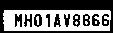

Processing: Cars197.png

0: 384x640 1 licence, 1448.0ms
Speed: 4.8ms preprocess, 1448.0ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)
[2025/03/18 00:21:21] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.026720285415649414
[2025/03/18 00:21:21] ppocr DEBUG: cls num  : 1, elapsed : 0.018904447555541992
[2025/03/18 00:21:21] ppocr DEBUG: rec_res num  : 1, elapsed : 0.1277177333831787
Ground Truth: LR33 TEE
PaddleOCR: L.R33 TEE
WER: 12.50%


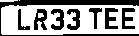

Processing: Cars265.png

0: 352x640 1 licence, 1365.2ms
Speed: 3.3ms preprocess, 1365.2ms inference, 1.4ms postprocess per image at shape (1, 3, 352, 640)
[2025/03/18 00:21:23] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.019882917404174805
[2025/03/18 00:21:23] ppocr DEBUG: cls num  : 1, elapsed : 0.016939401626586914
[2025/03/18 00:21:23] ppocr DEBUG: rec_res num  : 1, elapsed : 0.1215825080871582
Ground Truth: M 771276
PaddleOCR: M:771276
WER: 12.50%


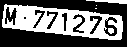


Average WER: 31.27%


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO
from paddleocr import PaddleOCR
from google.colab.patches import cv2_imshow
import os
import xml.etree.ElementTree as ET

# Set up PaddleOCR
ocr = PaddleOCR(use_angle_cls=True, lang="en")  # Initialize PaddleOCR

# Load YOLO model
model = YOLO("/content/best (1).pt")  # Change to your trained YOLO model

# Function to preprocess the cropped plate for better OCR
def preprocess_plate(plate):
    gray_plate = cv2.cvtColor(plate, cv2.COLOR_BGR2GRAY)
    filtered_plate = cv2.bilateralFilter(gray_plate, 11, 17, 17)
    _, binary_plate = cv2.threshold(filtered_plate, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return binary_plate

# Function to call PaddleOCR
def paddleocr_detection(image):
    result = ocr.ocr(image)
    if result and result[0]:
        return ' '.join([line[1][0] for line in result[0]])
    return ""

# Function to calculate WER
def calculate_wer(reference, hypothesis):
    ref_words = list(reference)
    hyp_words = list(hypothesis)

    import numpy as np
    d = np.zeros((len(ref_words) + 1, len(hyp_words) + 1))
    for i in range(len(ref_words) + 1):
        d[i][0] = i
    for j in range(len(hyp_words) + 1):
        d[0][j] = j

    for i in range(1, len(ref_words) + 1):
        for j in range(1, len(hyp_words) + 1):
            if ref_words[i - 1] == hyp_words[j - 1]:
                d[i][j] = d[i - 1][j - 1]
            else:
                d[i][j] = min(d[i - 1][j] + 1, d[i][j - 1] + 1, d[i - 1][j - 1] + 1)

    return d[len(ref_words)][len(hyp_words)] / max(len(ref_words), 1)

# Paths to folders containing images and annotations
folder_path = "/content/extracted_images/images ocr"
annotations_path = "/content/extracted_images/annotations/annotations ocr"

if not os.path.exists(folder_path):
    raise FileNotFoundError(f"The folder path {folder_path} does not exist.")
if not os.path.exists(annotations_path):
    raise FileNotFoundError(f"The annotations path {annotations_path} does not exist.")

total_wer = 0
num_images = 0

# Process each image in the folder
for filename in os.listdir(folder_path):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
        image_path = os.path.join(folder_path, filename)
        annotation_path = os.path.join(annotations_path, filename.replace(filename.split('.')[-1], 'xml'))

        if not os.path.exists(annotation_path):
            print(f"Annotation not found for: {filename}")
            continue

        print(f"Processing: {filename}")

        # Load the image
        image = cv2.imread(image_path)
        if image is None:
            print(f"Failed to load the image: {image_path}")
            continue

        # Extract ground truth text from XML annotation
        tree = ET.parse(annotation_path)
        root = tree.getroot()
        plate_text = root.find(".//plate_text").text.strip() if root.find(".//plate_text") is not None else ""

        # Run YOLO detection
        results = model(image)

        # Process each detected plate
        for result in results:
            for box in result.boxes:
                x1, y1, x2, y2 = map(int, box.xyxy[0])  # Get box coordinates
                cropped_plate = image[y1:y2, x1:x2]  # Crop plate region

                # Preprocess the plate image
                processed_plate = preprocess_plate(cropped_plate)

                # Run PaddleOCR
                recognized_text = paddleocr_detection(processed_plate)

                # Calculate WER
                wer = calculate_wer(plate_text, recognized_text)
                total_wer += wer
                num_images += 1

                # Show the cropped license plate and recognized text
                print(f"Ground Truth: {plate_text}")
                print(f"PaddleOCR: {recognized_text}")
                print(f"WER: {wer:.2%}")

                # Display the cropped plate
                cv2_imshow(processed_plate)

# Calculate and display average WER
if num_images > 0:
    average_wer = total_wer / num_images
    print(f"\nAverage WER: {average_wer:.2%}")
else:
    print("No valid plates found to calculate WER.")
